In [288]:
# IMPORTING THE IMPORTANT LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# LOADING THE APPLICATIONS DATASET
df_app = pd.read_csv("application_data.csv")
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# CHECKING THE TOTAL NUMBERS OF ROWS AND COLUMNS IN THE DATASET
df_app.shape


(307511, 122)

In [14]:
# LOADING THE PREVOIUS APPLICATION DATASET
df_prev = pd.read_csv("previous_application.csv")
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# CHECKING THE NUMBER OF ROES AND COLUMNS IN THE DATASET
df_prev.shape

(1670214, 37)

CLEANING ON THE DATASET

In [16]:
# DESCRIBING EACH NUMERICAL COLUMN OF APPLICATION DATASET
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [17]:
# PRINTING ALL THE COLUMN IN THE APPLICATION DATASET
print(df_app.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [22]:
# Checking the NUll Values
df_null = df_app.isnull().sum()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [25]:
# Calculating the NULL value Percentage
df_app_percent = round((100*df_app.isnull().sum()/len(df_app)),2)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_app_percent


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [26]:
# PRINTING THE TOTAL NUMBERS OF COLUMNS
print(len(df_app_percent))

122


In [27]:
df_app.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [28]:
# Removing the NULL Values more than the 19% MEAN VALUE
df_app = df_app.loc[:, ~(df_app.isnull().mean() > 0.19)]


In [32]:
# CHECKING THE REMAINING COLUMNS 
len(df_app.columns)

71

In [34]:
# CHECKING THE DATA ONCE AGAIN 
round((100*df_app.isnull().sum()/len(df_app)),2)



SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

# DATA CLEANING ON THE PREVIOUS_APPLICATION DATASET

In [36]:
df_prev_null = df_prev.isnull().sum()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_prev_null

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [35]:
# CHECKING THE NULL VALUES IN THE PREVIOUS_APPLICATION DATASET

df_prev_percent = round((100*df_prev.isnull().sum()/len(df_prev)),2)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df_prev_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [38]:
# PREVIOUS COUNT OF THE PREVIOUS_DATASET COLUMNS
len(df_prev.columns)

37

In [39]:
# REMOVING THE COLUMNS GREATER THAN 20%
df_prev = df_prev.loc[:, ~(df_prev.isnull().mean() > 0.20)]


In [40]:
# COUNT AFTER REMOVAL THE LESS SIGNIFICANT COLUMNS
len(df_prev.columns)

23

In [41]:
# CHECKING THE DATA ONCE AGAIN 
round((100*df_prev.isnull().sum()/len(df_prev)),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

# IMPUTING THE MISSING VALUES

In [44]:
#Imputing the missing values in Names_Type_Suite on categorical colums
df_app['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [45]:
# Checking the Mode value in the Name_type_Suite column
df_app['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [46]:
# Filling the "Name_type_suite" columns with the mode value i.e. 'unaccompanied' as it is most occuring value in the columns
df_app['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied',inplace = True)

C:\Users\Hardik Chaudhari\AppData\Local\Temp\ipykernel_16320\3549703658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied',inplace = True)


In [50]:
# Imputing the Missing values in the Numerial Columns
'''
AMT_REQ_CREDIT_BUREAU_HOUR      
AMT_REQ_CREDIT_BUREAU_DAY       
AMT_REQ_CREDIT_BUREAU_WEEK      
AMT_REQ_CREDIT_BUREAU_MON       
AMT_REQ_CREDIT_BUREAU_QRT       
AMT_REQ_CREDIT_BUREAU_YEAR      
'''
df_app.AMT_REQ_CREDIT_BUREAU_HOUR.mean()


0.006402448193930645

In [63]:
# Filling the AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,
#AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR with '0' as most of the values in the columns are '0'
df_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'] = df_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

In [54]:
# Checking the AMT_GOODS_PRICE column
df_app.AMT_GOODS_PRICE.mean()

538396.2074288895

In [55]:
# We can impute the mean value of AMT_GOODS_PRICE
df_app['AMT_GOODS_PRICE'].fillna(df_app.AMT_GOODS_PRICE.mean(), inplace = True)

C:\Users\Hardik Chaudhari\AppData\Local\Temp\ipykernel_16320\1300360239.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app['AMT_GOODS_PRICE'].fillna(df_app.AMT_GOODS_PRICE.mean(), inplace = True)


In [56]:
# Since the AMT_ANNUITY column has the outlier, so replacing the null values with the mean values would effect our conclusion 
# therefore we use median values

df_app['AMT_ANNUITY'].fillna(df_app.AMT_ANNUITY.median(),inplace=True)

C:\Users\Hardik Chaudhari\AppData\Local\Temp\ipykernel_16320\585507423.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app['AMT_ANNUITY'].fillna(df_app.AMT_ANNUITY.median(),inplace=True)


In [64]:
# Rechecking the application_dataset for the NULL values
round((100*df_app.isnull().sum()/len(df_app)),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

# Checking the Data Types of the Columns

In [65]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [69]:
# Converting the data types of some of the columns that should not be float data-type
df_app['DAYS_REGISTRATION'] = df_app['DAYS_REGISTRATION'].astype(int, errors='ignore')

df_app['CNT_FAM_MEMBERS'] = df_app['CNT_FAM_MEMBERS'].astype(int, errors='ignore')

df_app['OBS_30_CNT_SOCIAL_CIRCLE'] = df_app['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')

df_app['DEF_30_CNT_SOCIAL_CIRCLE'] = df_app['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')

df_app['OBS_60_CNT_SOCIAL_CIRCLE'] = df_app['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')

df_app['DEF_60_CNT_SOCIAL_CIRCLE'] = df_app['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_DAY' ] = df_app['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_MON'] = df_app['AMT_REQ_CREDIT_BUREAU_MON'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_QRT'] = df_app['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_YEAR'] =  df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int, errors='ignore')

# Removing the unwanted columns from the Application Dataset

In [77]:
#We will remove the unwanted columns from the application_dataset

unwanted = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
            'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 
            'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 
            'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
            'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']


df_app.drop(labels=unwanted, axis=1, inplace=True)

# Checking the Gender and Organisation column for any error

In [78]:
# Checking the Gender columns first
df_app.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [79]:
# Replacing the 'XNA'  values with the Females as majority is Females  and won't affect our analysis 
df_app.CODE_GENDER.replace(to_replace = 'XNA',value = 'F',inplace=True)

C:\Users\Hardik Chaudhari\AppData\Local\Temp\ipykernel_16320\2221012108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app.CODE_GENDER.replace(to_replace = 'XNA',value = 'F',inplace=True)


In [80]:
# Confirmation of changes in the Gender column
df_app.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [82]:
# Checking the Organisation Column Second
df_app.ORGANIZATION_TYPE .value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [83]:
# Hence , dropping the rows have 'XNA' values in the organistion type column
df_app = df_app.drop(df_app.loc[df_app['ORGANIZATION_TYPE']=='XNA'].index)

In [84]:
# Confirmation of the Organisation columns
df_app.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

In [85]:
df_app.AMT_INCOME_TOTAL.max()

117000000.0

# Creating bins for the AMT_INCOME_TOTAL and AMT_Credit

In [89]:
# Creating bins for the Income column i.e "AMT_INCOME_TOTAL"

# bins_income [0,25000, 50000,75000, 100000,125000, 150000,175000,200000,225000, 250000,275000,300000,325000,350000,375000,400000,421
bins_credit =  [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,
             700000,750000,800000,850000,900000,950000,1000000]

slots_credit = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-350000',
                '350000-400000','400000-450000','450000-500000','500000-550000','550000-600000','600000-650000',
                '650000-700000','700000-750000','750000-800000','800000-850000','850000-900000',
                '900000-950000','950000 and above']

df_app['AMT_INCOME_TOTAL_BINNED'] = pd.cut(df_app['AMT_CREDIT'],bins=bins_credit,labels=slots_credit,right=True)

# Checking the IMBALANCE ratio

In [91]:
# Looking into the Target DATA

df_app.TARGET.value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64


### Target = 0 means the people those who are non-defaulters

### Target = 1 means the people those who are are defaulters


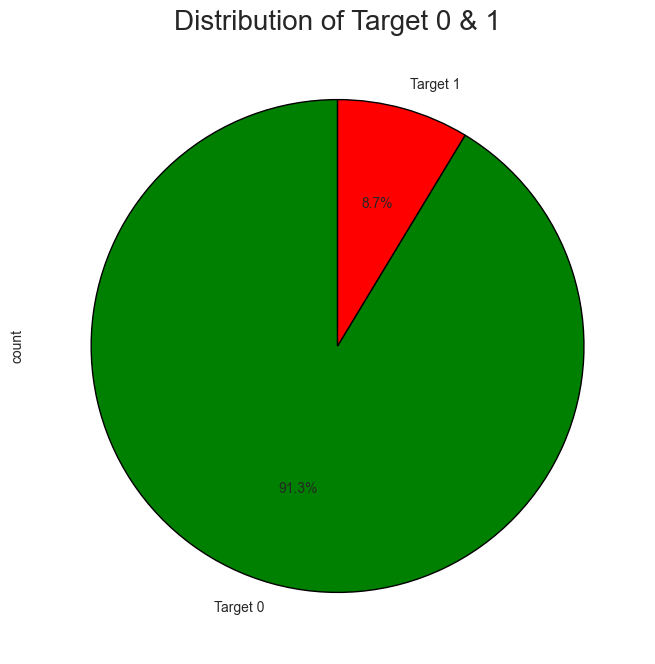

In [294]:
# Plotting the Targets

# Pie Chart
plt.figure(figsize=(8, 8))

# Creating the pie chart
df_app.TARGET.value_counts().plot.pie(
    autopct='%1.1f%%',  # Show percentage
    colors=['Green', 'Red'],  # Colors for 0 and 1
    labels=['Target 0', 'Target 1'],  # Labels
    startangle=90,  # Start angle for a better view
    wedgeprops={'edgecolor': 'black'}  # Add edge color for better aesthetics
)

# Add a title
plt.title('Distribution of Target 0 & 1', fontsize=20)

# Display the chart
plt.show()


1. Non-defaulter people has significantly higher observations (around 220,000+) compared to defaulter people (around 25,000). 
2. This dataset 'TARGET' column is imbalanced. 

In [131]:
# Checking the IMBALANCE Ratio for  the target Column\

target_0 = df_app.loc[df_app["TARGET"]==0]
target_1 = df_app.loc[df_app["TARGET"]==1]

round(len(target_0)/len(target_1),2)

10.55

In [202]:
target_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230302 entries, 1 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   230302 non-null  int64   
 1   TARGET                       230302 non-null  int64   
 2   NAME_CONTRACT_TYPE           230302 non-null  object  
 3   CODE_GENDER                  230302 non-null  object  
 4   FLAG_OWN_CAR                 230302 non-null  object  
 5   FLAG_OWN_REALTY              230302 non-null  object  
 6   CNT_CHILDREN                 230302 non-null  int64   
 7   AMT_INCOME_TOTAL             230302 non-null  float64 
 8   AMT_CREDIT                   230302 non-null  float64 
 9   AMT_ANNUITY                  230302 non-null  float64 
 10  AMT_GOODS_PRICE              230302 non-null  float64 
 11  NAME_TYPE_SUITE              230302 non-null  object  
 12  NAME_INCOME_TYPE             230302 non-null  obj

In [133]:
target_1.shape

(21835, 43)

UniVariate Analysis

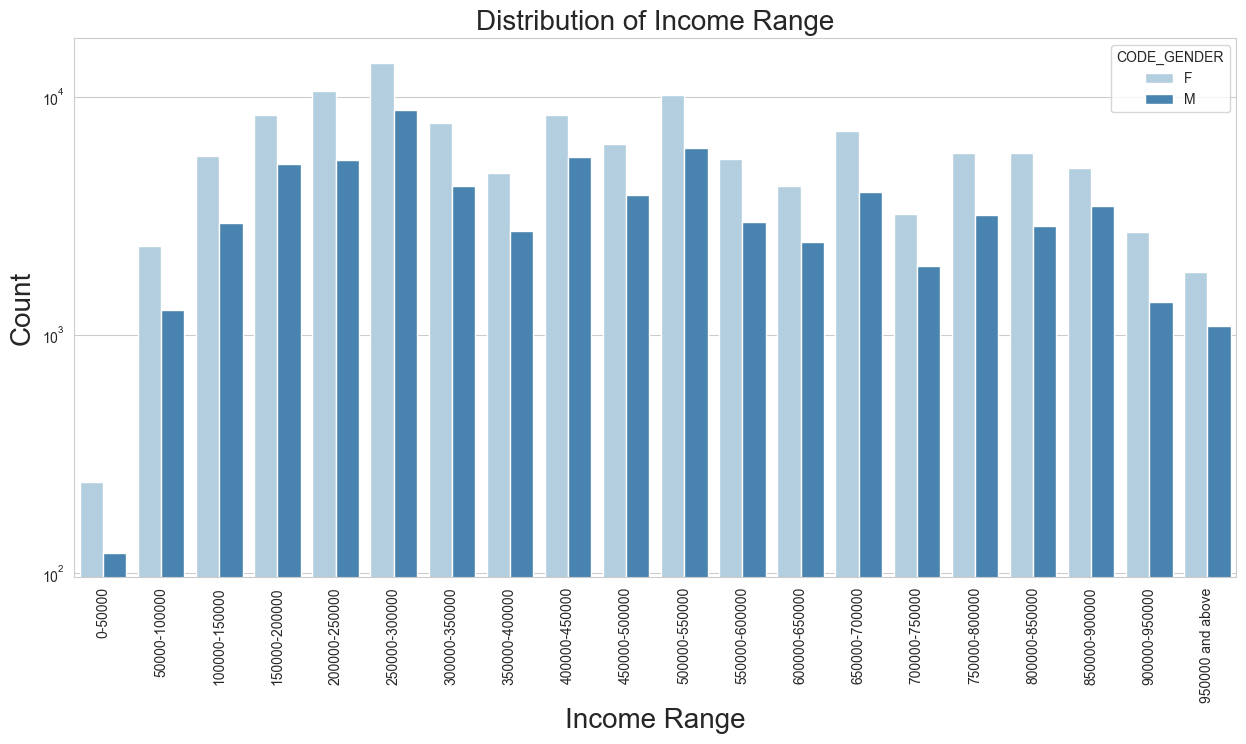

In [101]:
# Plotting the a bar plot for those having no difficulties in re-paying the loan i.e the Target==0 people

plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

sns.countplot(data=target_0, x ='AMT_INCOME_TOTAL_BINNED', hue = 'CODE_GENDER',palette = 'Blues')

plt.title('Distribution of Income Range',fontsize=20)
plt.xlabel('Income Range',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

### Conclusion From the Graph
1. Income range from 250000-300000 is having the more Numbers of credits very less count from range 0-50000
2. It seems that the females are more than males in having the credit for range 250000 - 300000

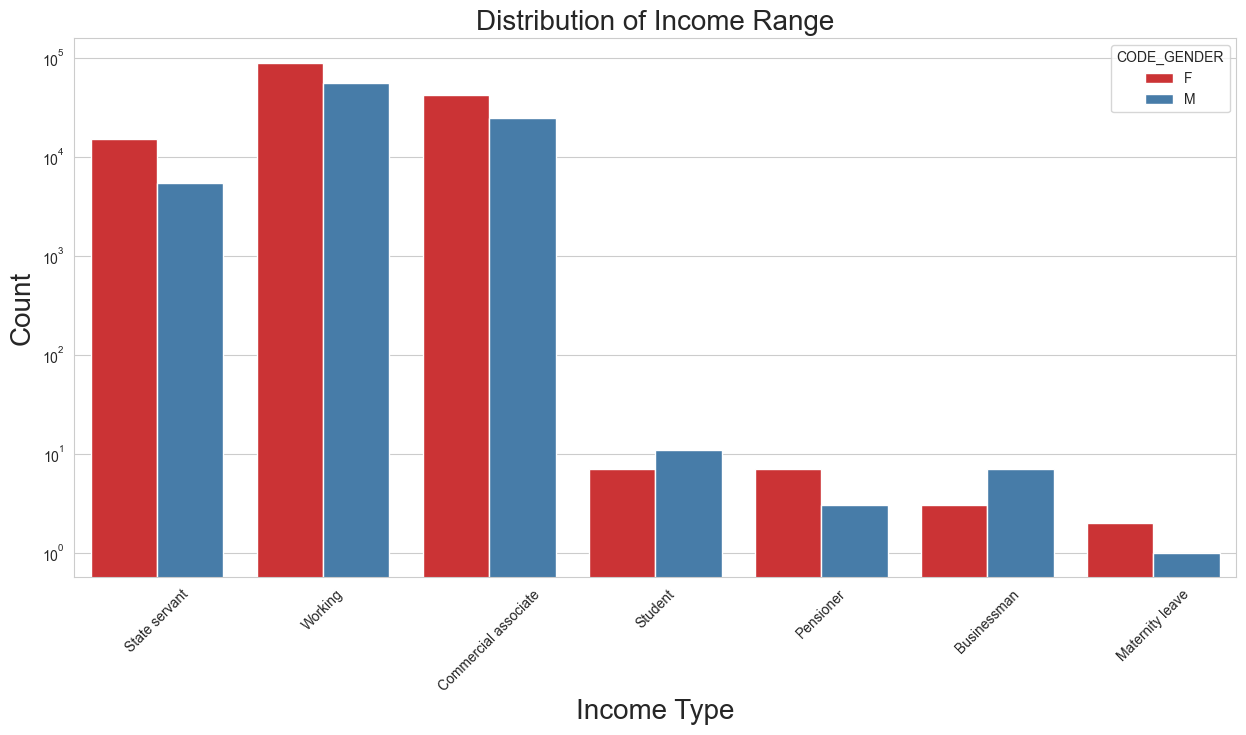

In [103]:
#Plotting for the various Income Types across various Gender

plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

sns.countplot(data=target_0, x ='NAME_INCOME_TYPE', hue = 'CODE_GENDER',palette = 'Set1')

plt.title('Distribution of Income Range',fontsize=20)
plt.xlabel('Income Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

### Conclusion From the Graph
1. It seems that working Women have most Credit Score
2. It seems that 'State Servant' Working and 'Commercial Assosiate' have more more credits counts compared to each others
3. It seems that Maternity Leave has less Credit in comparision to others

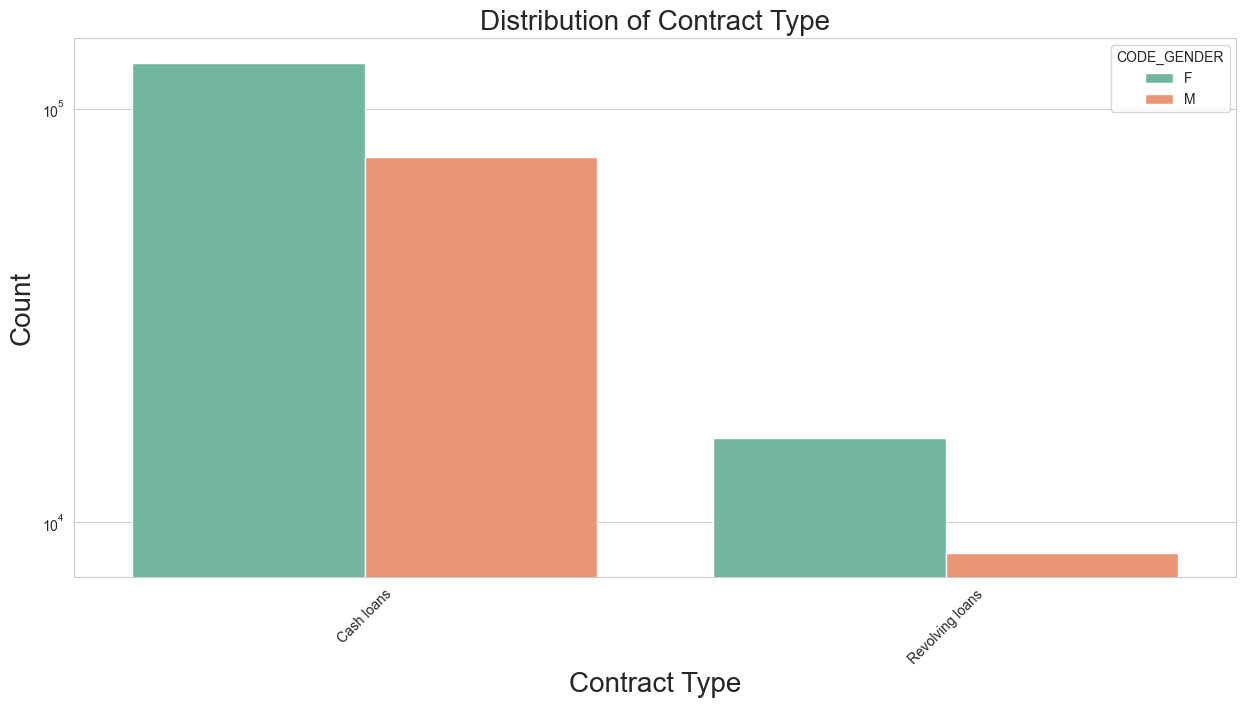

In [104]:
# PLotting the Contract type across various Genders

plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

sns.countplot(data=target_0, x ='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER',palette = 'Set2')

plt.title('Distribution of Contract Type',fontsize=20)
plt.xlabel('Contract Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

### Conclusion From the Graph

1. It seems that cash Loans is having higher number of credits than 'Revolving Loans' Contract Type
2. Also, Females applied for more credits

C:\Users\Hardik Chaudhari\AppData\Local\Temp\ipykernel_16320\1201798436.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=target_0, y ='ORGANIZATION_TYPE', order = target_0['ORGANIZATION_TYPE'].value_counts().index,palette ='cool')


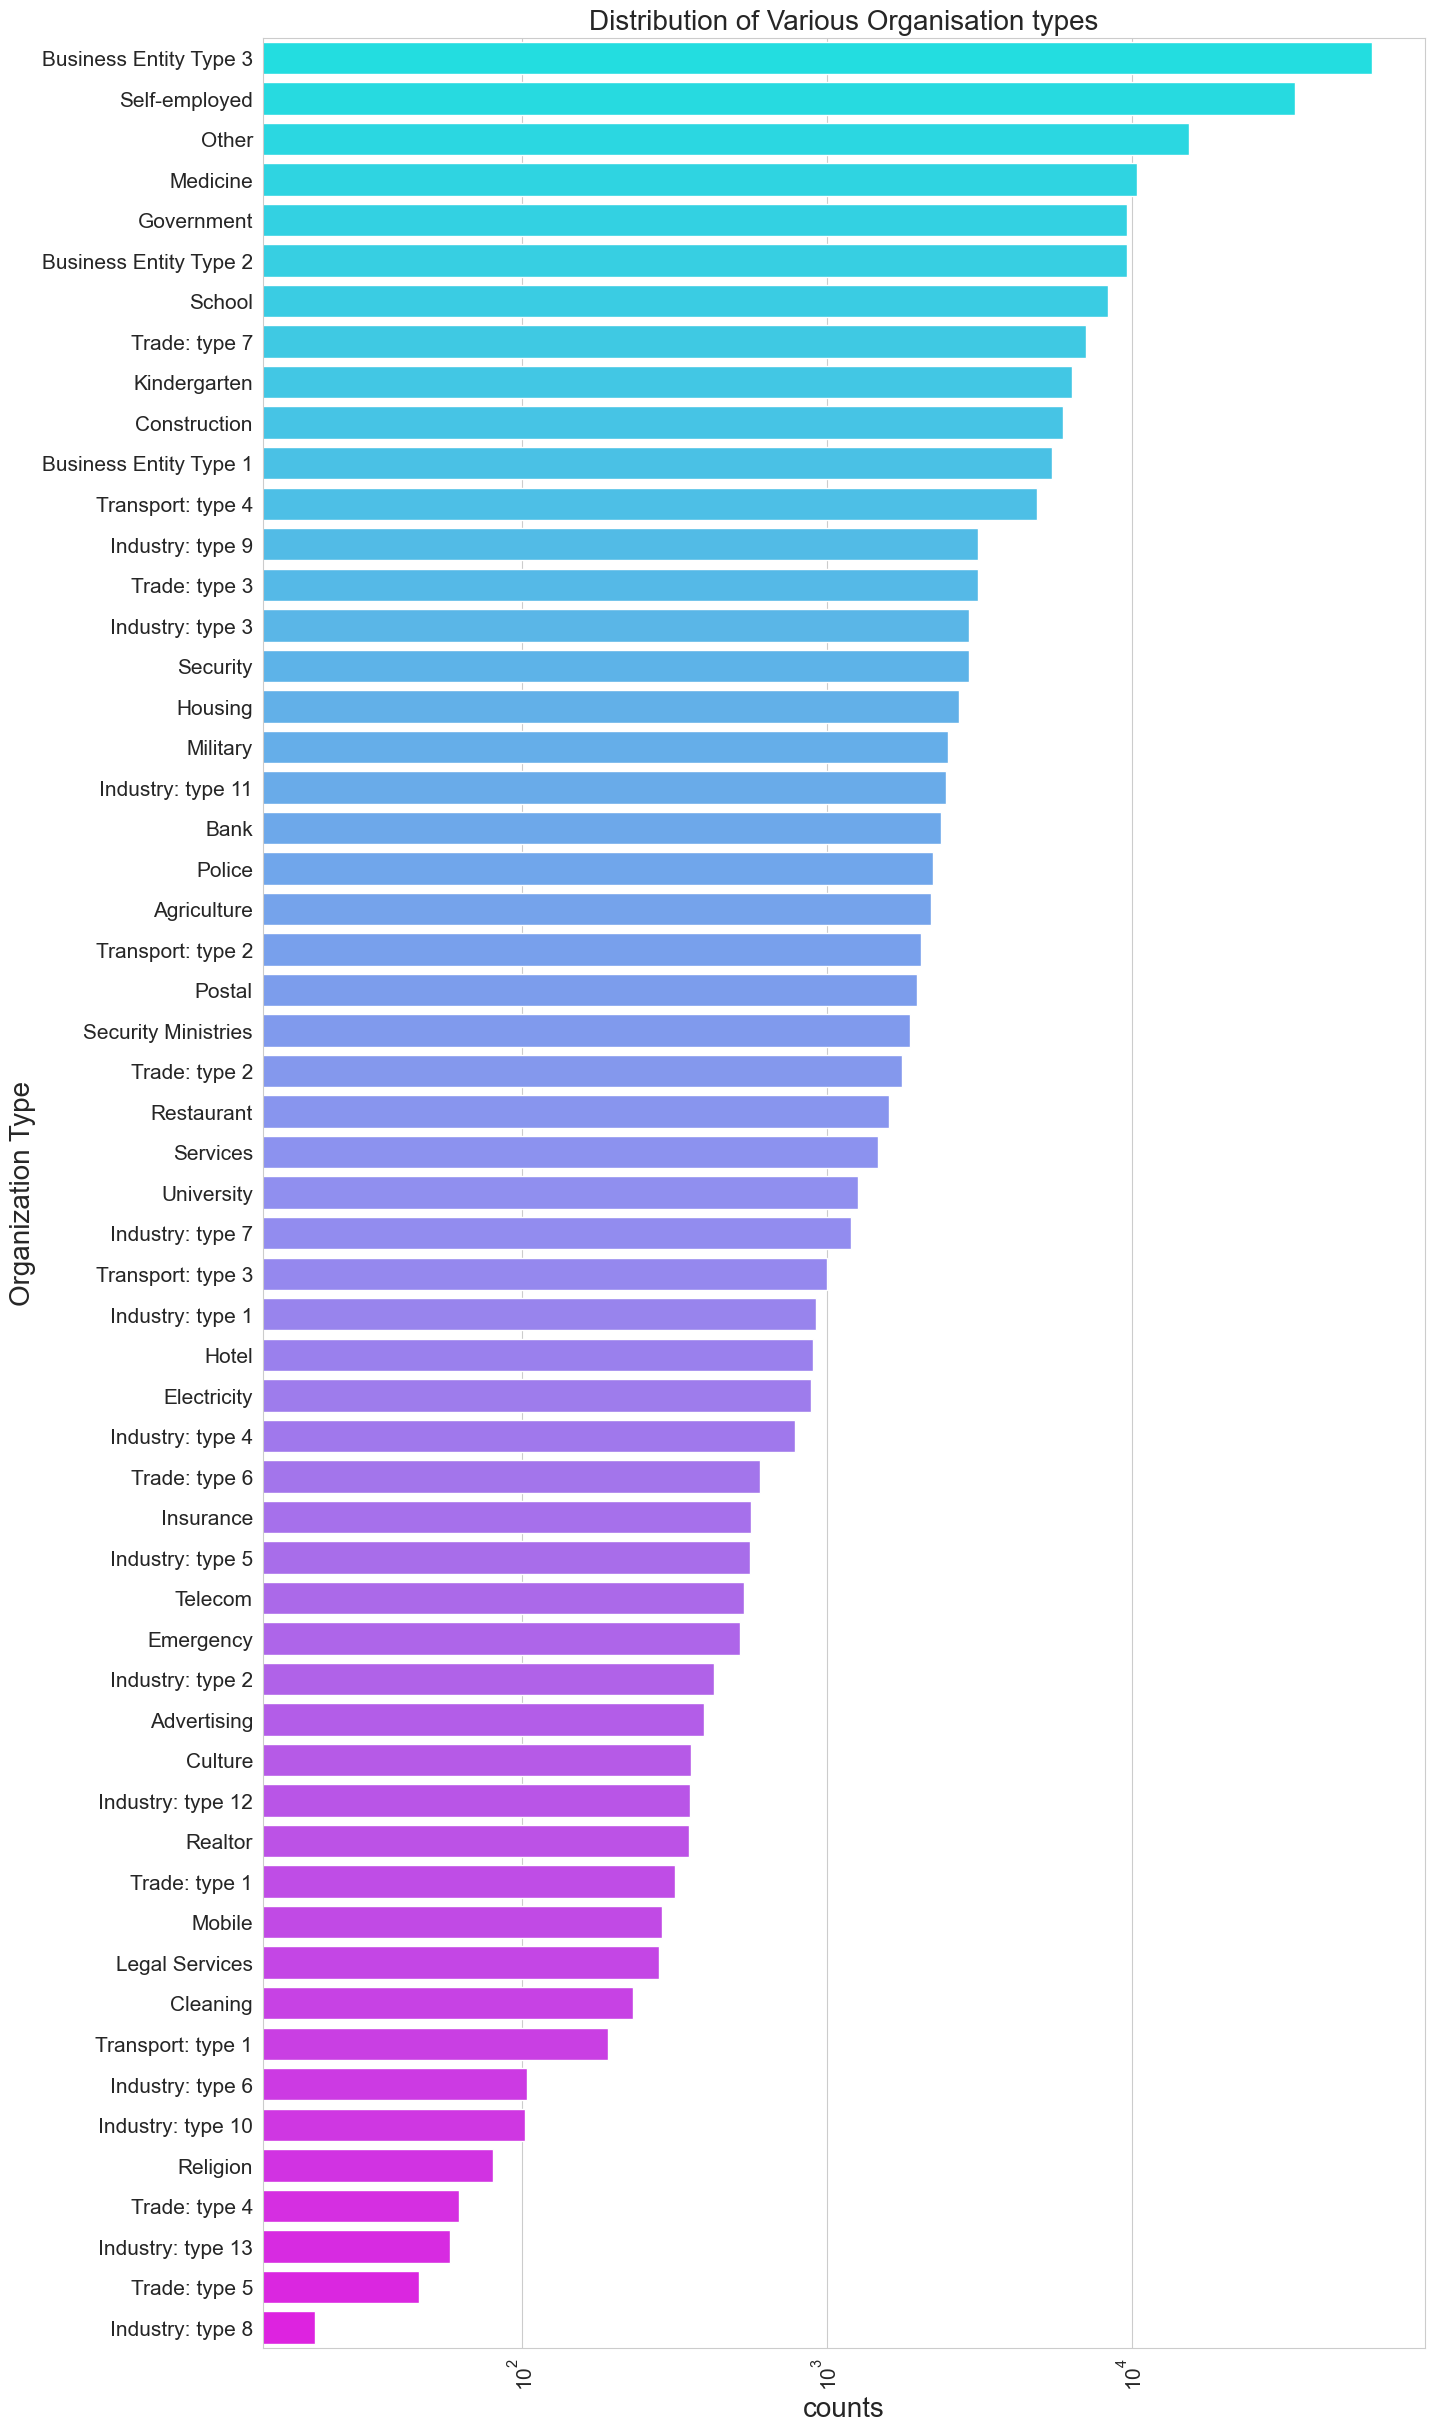

In [144]:
# PLotting for the various Organisation Types

plt.figure(figsize=(15,30))
sns.set_style('whitegrid')

sns.countplot(data=target_0, y ='ORGANIZATION_TYPE', order = target_0['ORGANIZATION_TYPE'].value_counts().index,palette ='cool')

plt.title('Distribution of Various Organisation types',fontsize=20)
plt.xlabel('counts',fontsize=20)
plt.ylabel('Organization Type',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=90,fontsize=15)

plt.xscale('log')

plt.show()

### Conclusion from the graph
1. Clients which have applied for the credits are from most of the organisation type 'Business entity Type-3',Self-Employed: 'Other', 'Medicine'
and 'Goverment'
2. Less Clients are from  Industry type 8, type 6, type 10 religion  and trade type 5 and type4

# Plotting for those who have difficulty in re-paying the loan i.e Target==1

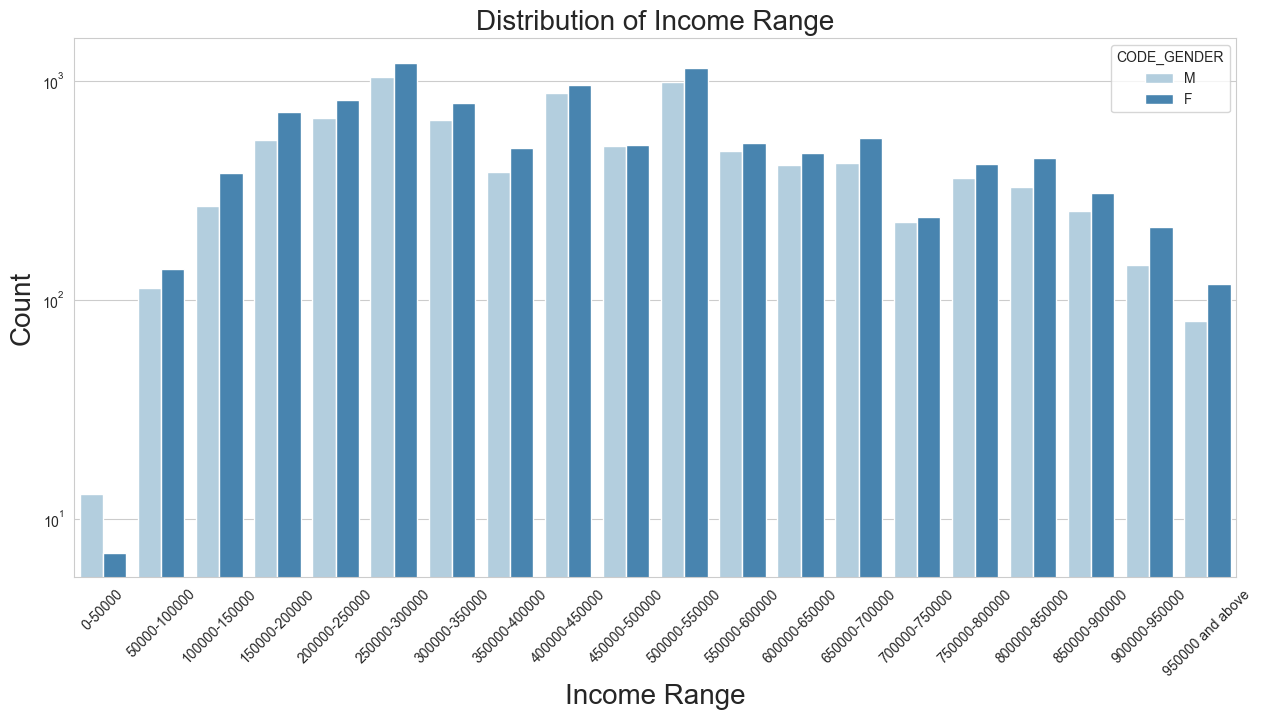

In [135]:
# Plotting for Income Range across the 

plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
sns.countplot(data=target_1, x ='AMT_INCOME_TOTAL_BINNED', hue = 'CODE_GENDER',palette = 'Blues')

plt.title('Distribution of Income Range',fontsize=20)
plt.xlabel('Income Range',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

### Conclusion Of the Graph
Overall, the data suggests a skew towards higher income levels and a gender disparity, with females generally earning more than males in the represented income ranges

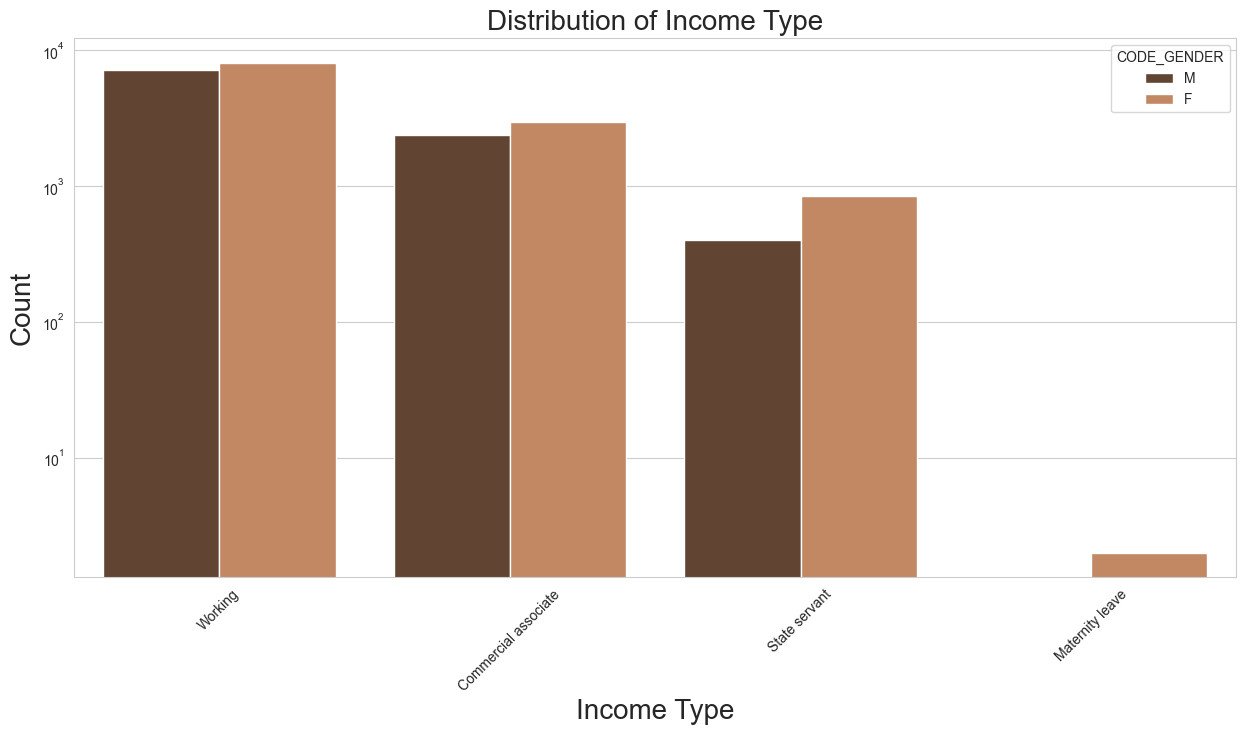

In [141]:
#Plotting For the various Income Type Across various Gender
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

sns.countplot(data=target_1, x ='NAME_INCOME_TYPE', hue = 'CODE_GENDER',palette = 'copper')

plt.title('Distribution of Income Type',fontsize=20)
plt.xlabel('Income Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

### Conclusion from the Graph
1. For Income type 'Working','commercial assosiate' and 'State Servant' the number of credits are higher than others i.e 'Maternity Leave'
2. For this Females have more credits than males
3. Less number of credits for Income  'Maternity Leave'

This analysis suggests a significant representation of working and commercial activities among both genders while highlighting an area for further exploration regarding equal representation in income types like state servant roles and maternity leave impacts.

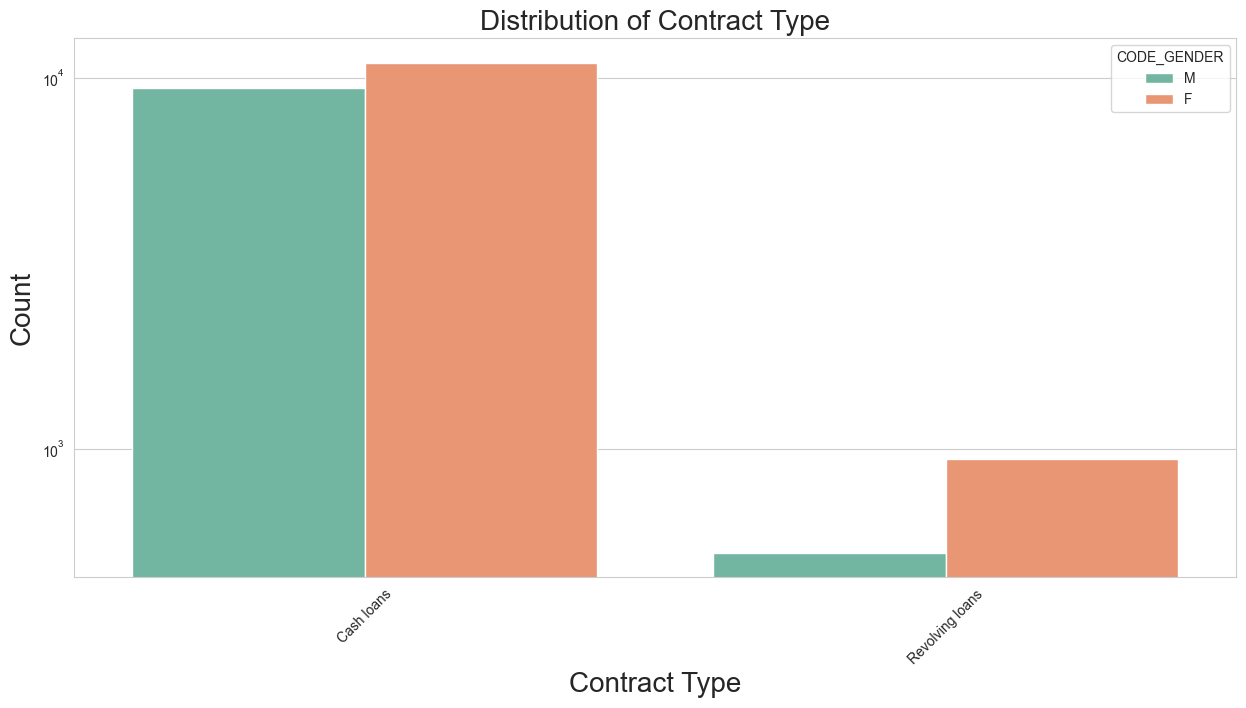

In [142]:
# Plotting or the Contract tyoe across various Gender
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

sns.countplot(data=target_, x ='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER',palette = 'Set2')

plt.title('Distribution of Contract Type',fontsize=20)
plt.xlabel('Contract Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

## Conclusion from the Graph

1. For Contract Type 'Cash Loans' is having higher numbers of credits than 'Revolving Loans' contract type

2. For this also Female is leading for applying credits

This data emphasizes gender differences in loan types, with a general preference for Cash loans across both genders.

C:\Users\Hardik Chaudhari\AppData\Local\Temp\ipykernel_16320\4094964419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=target_1, y ='ORGANIZATION_TYPE', order = target_1['ORGANIZATION_TYPE'].value_counts().index,palette ='cool')


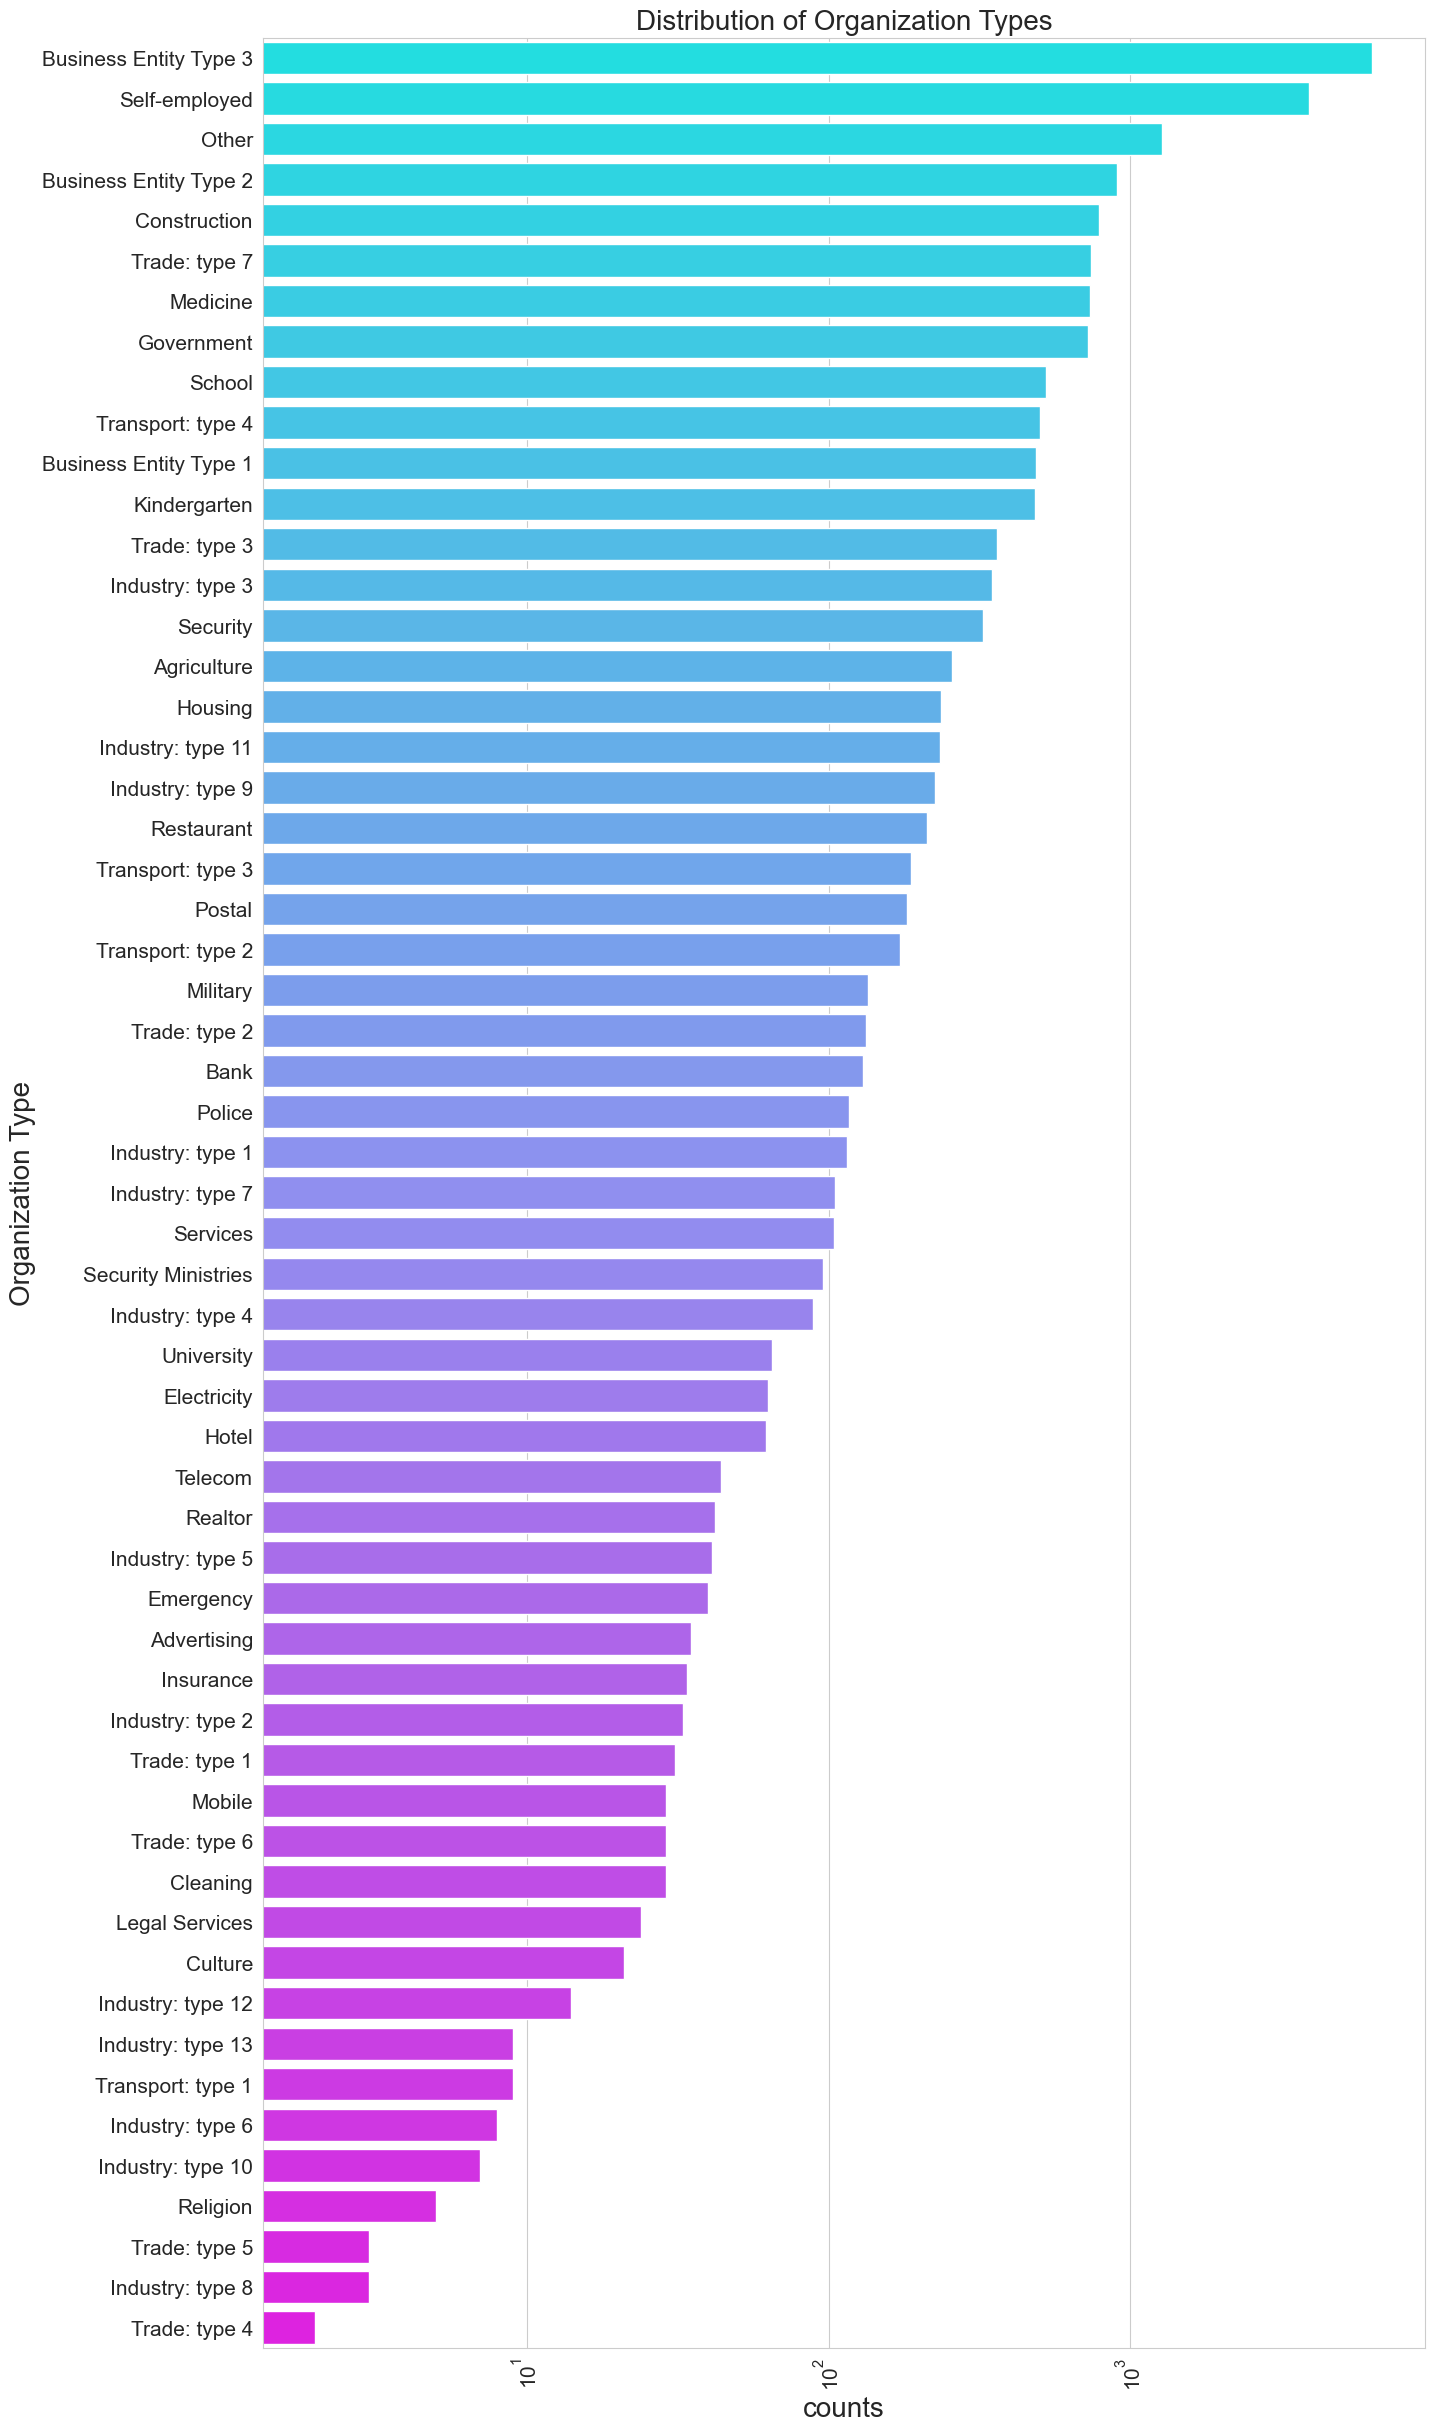

In [290]:
# PLotting for the various Organisation Types

plt.figure(figsize=(15,30))
sns.set_style('whitegrid')

sns.countplot(data=target_1, y ='ORGANIZATION_TYPE', order = target_1['ORGANIZATION_TYPE'].value_counts().index,palette ='cool')

plt.title('Distribution of Organization Types',fontsize=20)
plt.xlabel('counts',fontsize=20)
plt.ylabel('Organization Type',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=90,fontsize=15)

plt.xscale('log')

plt.show()

### Conclusion from the graph
This analysis underscores the prevalent organization types while also pointing to less common sectors, offering insights into the composition of the local economy.

## Defining the Correaltion

In [152]:
# Calculating the correlation among the target_0 people
numerical_cols = target_0.select_dtypes(include=['number'])

target_0_corr = numerical_cols.iloc[0:, 2:].corr()

target_0_corr


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.009826,-0.018704,-0.007612,-0.022277,-0.030352,0.242462,0.063036,0.162900,-0.117746,0.893276,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414,-0.026134,0.019388,0.003419,0.019062,0.002384,-0.001019,0.000660,0.000047,-0.017476,-0.000453,-0.020784
AMT_INCOME_TOTAL,-0.009826,1.000000,0.326155,0.400752,0.333217,0.169306,-0.045543,-0.030102,0.034508,-0.026462,-0.003133,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238,0.137752,-0.030661,-0.027914,-0.030477,-0.027415,0.002664,0.009039,0.009068,0.054560,0.016234,0.038459
AMT_CREDIT,-0.018704,0.326155,1.000000,0.762103,0.986315,0.103876,-0.152659,-0.087500,-0.015180,-0.034914,0.036760,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834,0.136033,-0.003803,-0.022223,-0.003770,-0.024255,-0.002694,0.006213,0.000279,0.054174,0.022967,-0.027913
AMT_ANNUITY,-0.007612,0.400752,0.762103,1.000000,0.766464,0.122206,-0.091571,-0.052470,0.009814,-0.025990,0.041231,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268,0.126979,-0.016426,-0.023286,-0.016241,-0.024129,0.003876,0.003148,0.013904,0.033052,0.014217,-0.001546
AMT_GOODS_PRICE,-0.022277,0.333217,0.986315,0.766464,1.000000,0.106988,-0.146764,-0.088601,-0.011840,-0.036679,0.034889,0.049964,0.023522,0.052040,0.052319,-0.036935,-0.039240,-0.015803,0.142436,-0.003960,-0.023445,-0.003970,-0.025066,-0.002259,0.006563,0.000791,0.055770,0.023351,-0.030615
REGION_POPULATION_RELATIVE,-0.030352,0.169306,0.103876,0.122206,0.106988,1.000000,-0.041138,0.008663,-0.059696,-0.004014,-0.028813,0.174754,-0.003262,0.065822,0.092300,-0.053687,-0.049449,-0.017033,0.207116,-0.013763,0.005047,-0.013241,0.000658,-0.001447,0.001957,-0.003770,0.074797,-0.002376,-0.003650
DAYS_BIRTH,0.242462,-0.045543,-0.152659,-0.091571,-0.146764,-0.041138,1.000000,0.352662,0.299000,0.108050,0.178013,0.048619,0.058344,0.039298,0.014175,0.165505,0.112517,0.031121,-0.142263,0.019531,0.015212,0.019128,0.015897,-0.000236,0.001093,-0.003593,-0.033796,-0.008802,-0.069111
DAYS_EMPLOYED,0.063036,-0.030102,-0.087500,-0.052470,-0.088601,0.008663,0.352662,1.000000,0.172102,0.086679,0.031523,0.022200,0.056714,0.082435,0.063205,0.112019,0.125791,0.074665,-0.081558,-0.000752,0.007447,-0.000811,0.009392,-0.003171,0.000872,-0.001395,-0.029415,-0.002094,-0.024442
DAYS_REGISTRATION,0.162900,0.034508,-0.015180,0.009814,-0.011840,-0.059696,0.299000,0.172102,1.000000,0.029895,0.155681,-0.031501,0.020549,0.017588,0.009254,0.047235,0.055274,0.031350,-0.071737,0.016317,0.007925,0.016130,0.008158,-0.002818,0.000637,-0.000589,-0.020348,0.002215,-0.018025
DAYS_ID_PUBLISH,-0.117746,-0.026462,-0.034914,-0.025990,-0.036679,-0.004014,0.108050,0.086679,0.029895,1.000000,-0.109789,0.005436,0.026744,0.020968,0.008941,0.053424,0.033071,0.001767,-0.059634,-0.008769,0.008669,-0.009280,0.010258,0.001470,-0.003028,-0.009028,-0.030810,-0.014189,-0.056114


<function matplotlib.pyplot.show(close=None, block=None)>

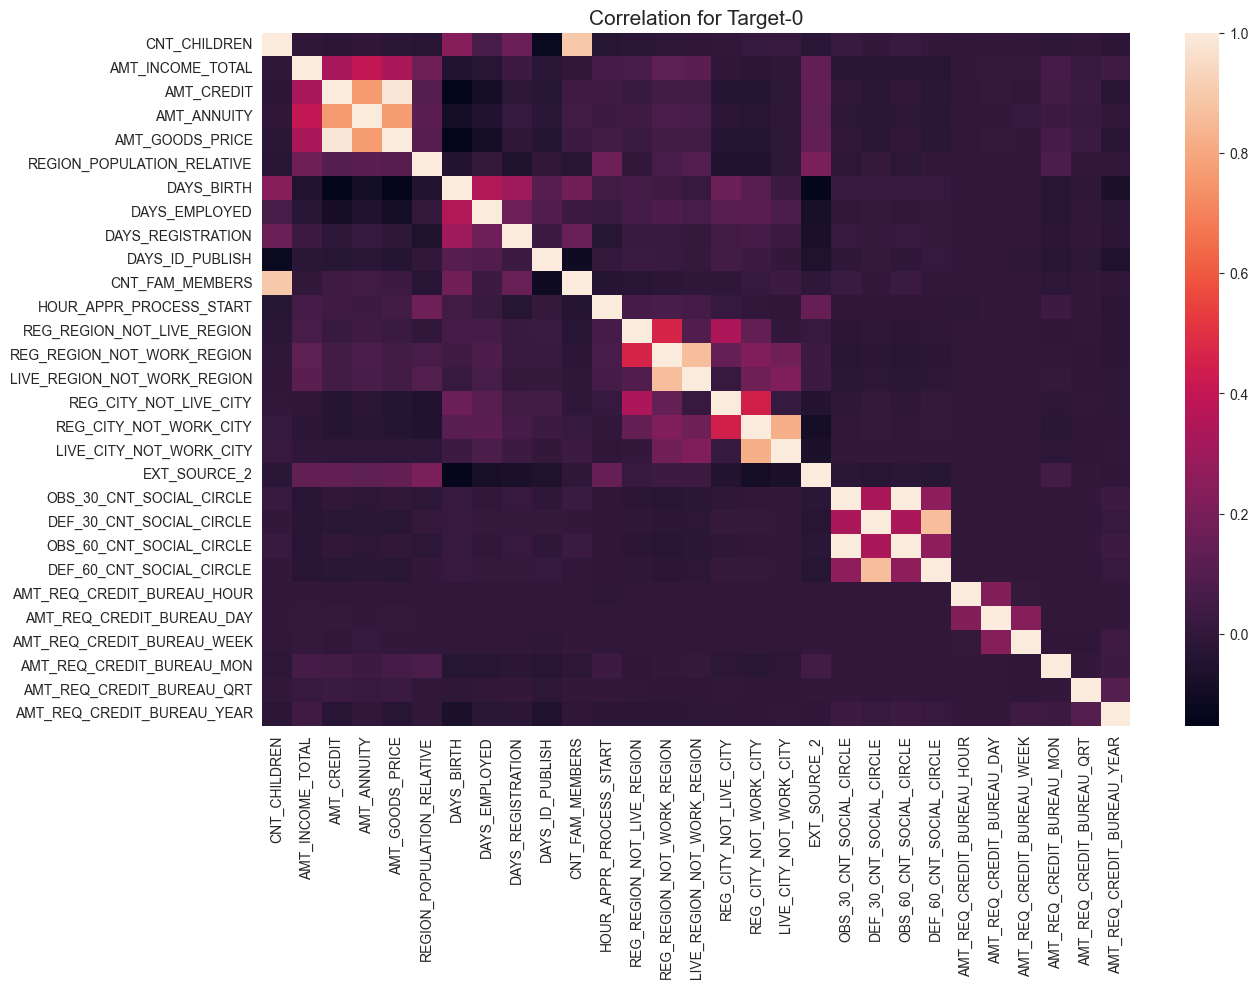

In [155]:
# PLotting the corelation for thr target_0

plt.figure(figsize=(14,9))
sns.heatmap(target_0_corr,annot = False )
plt.title("Correlation for Target-0",fontsize=15)
plt.show

### Conclusion Of the Graph
1. Implications for Analysis: The identified strong predictors can be prioritized in further modeling and analysis, while the weaker features may warrant further examination to determine their relevance.
2. This correlation analysis serves as a foundation for feature selection and model development, highlighting the importance of certain financial variables in relation to the target outcome.

In [156]:
# Calculating the Correalation among the target_1 people
numerical_cols1 = target_1.select_dtypes(include=['number'])

target_1_corr = numerical_cols1.iloc[0:, 2:].corr()

target_1_corr


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,-0.007707,-0.032019,0.176563,0.032627,0.126411,-0.089861,0.893829,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332,-0.010600,0.028712,0.002959,0.027955,-0.003220,-0.001269,-0.008695,-0.006195,-0.015163,-0.011841,-0.015698
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.036086,0.008476,-0.007822,-0.000039,-0.003959,-0.008858,0.003692,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401,0.006201,-0.005866,-0.005849,-0.005765,-0.005282,0.000925,-0.000071,0.000885,0.005141,0.000607,0.005657
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,0.982239,0.069220,-0.189512,-0.106003,-0.033250,-0.062405,0.045420,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875,0.126885,0.015835,-0.031869,0.016319,-0.035170,-0.005051,-0.000943,0.013307,0.061456,-0.003275,-0.008383
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.748651,0.074406,-0.090497,-0.049032,0.014302,-0.044289,0.054884,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806,0.120642,-0.000018,-0.024644,0.001216,-0.027918,0.010425,-0.001406,0.034566,0.051267,-0.002792,-0.003192
AMT_GOODS_PRICE,-0.007707,0.036086,0.982239,0.748651,1.000000,0.076210,-0.185486,-0.111906,-0.032067,-0.064666,0.042147,0.042280,0.023532,0.039387,0.038453,-0.035652,-0.041491,-0.017052,0.137716,0.016710,-0.027045,0.017255,-0.029544,-0.004194,0.000755,0.015111,0.064831,-0.002224,-0.011406
REGION_POPULATION_RELATIVE,-0.032019,0.008476,0.069220,0.074406,0.076210,1.000000,-0.049958,-0.015758,-0.055746,-0.011965,-0.030847,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017,0.170162,0.004513,0.023877,0.004907,0.015341,0.000885,-0.001070,0.007411,0.067029,-0.002863,0.004887
DAYS_BIRTH,0.176563,-0.007822,-0.189512,-0.090497,-0.185486,-0.049958,1.000000,0.307018,0.241202,0.135519,0.110353,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044,-0.142909,-0.009064,0.011109,-0.009647,0.012546,0.010105,0.000314,-0.001082,-0.032843,-0.019140,-0.093098
DAYS_EMPLOYED,0.032627,-0.000039,-0.106003,-0.049032,-0.111906,-0.015758,0.307018,1.000000,0.137454,0.096559,-0.001630,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026,-0.094249,-0.030834,0.000503,-0.030778,0.000288,0.007059,-0.007546,-0.012194,-0.028851,0.007965,-0.044658
DAYS_REGISTRATION,0.126411,-0.003959,-0.033250,0.014302,-0.032067,-0.055746,0.241202,0.137454,1.000000,0.049891,0.123583,-0.048209,0.010866,0.004578,0.000767,0.028759,0.049148,0.028976,-0.077788,0.014861,0.014170,0.015193,0.012064,-0.003311,0.000184,0.006521,-0.001332,-0.009887,-0.018053
DAYS_ID_PUBLISH,-0.089861,-0.008858,-0.062405,-0.044289,-0.064666,-0.011965,0.135519,0.096559,0.049891,1.000000,-0.088621,0.008774,0.025320,0.013408,0.002667,0.047784,0.016251,-0.014871,-0.065811,-0.020269,0.012605,-0.020052,0.009585,0.000149,-0.015244,-0.003879,-0.032077,-0.004953,-0.073064


<function matplotlib.pyplot.show(close=None, block=None)>

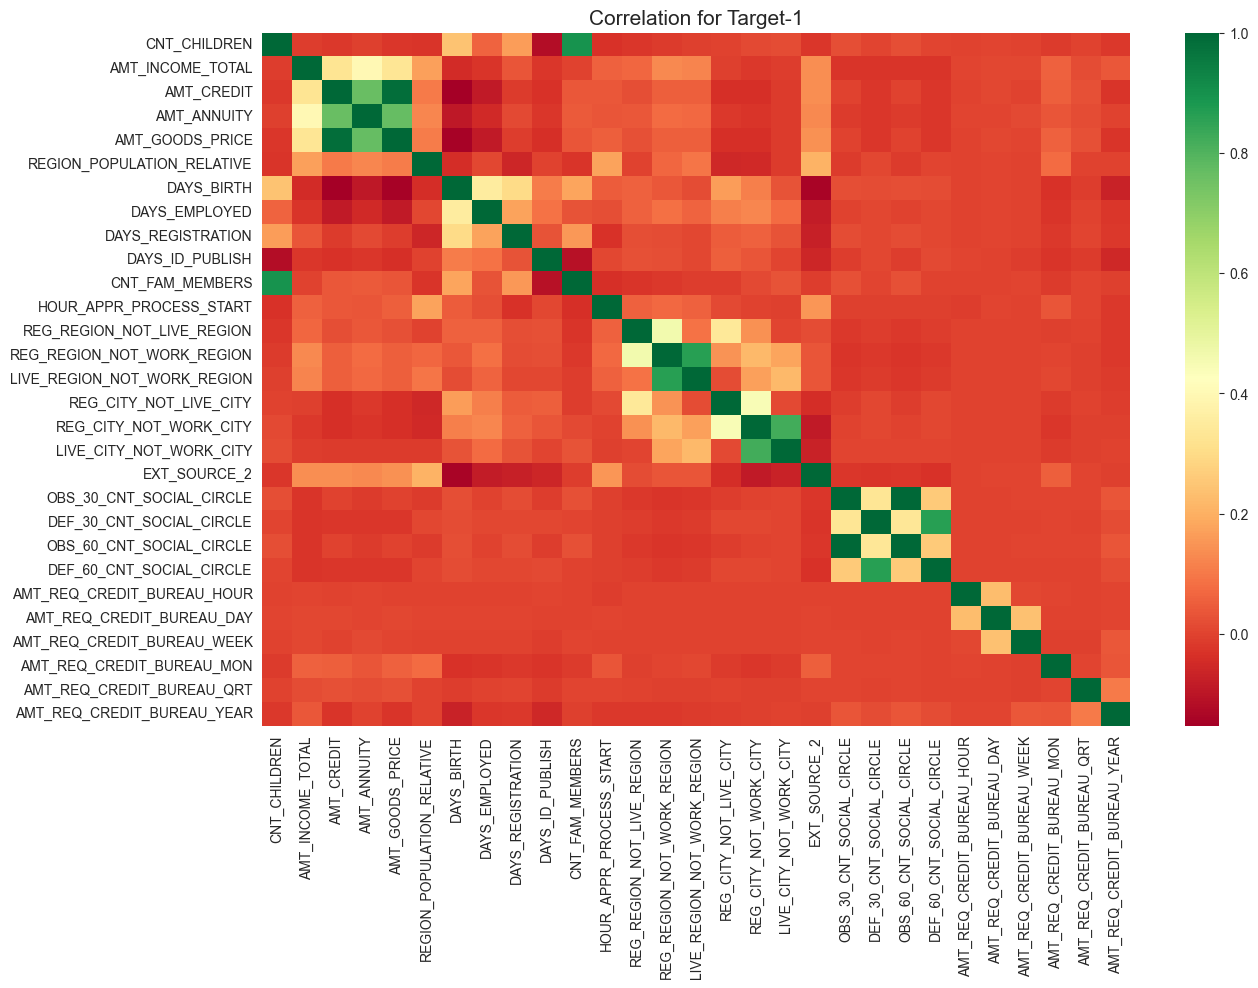

In [157]:
# PLotting the corelation for thr target_1

plt.figure(figsize=(14,9))
sns.heatmap(target_0_corr,annot = False, cmap='RdYlGn' )
plt.title("Correlation for Target-1",fontsize=15)
plt.show

### Conclusion of the Graph
1. Model Implications: This analysis provides a basis for feature selection, emphasizing the importance of focusing on the highly correlated 
   variables when developing predictive models for Target-1, while reconsidering the role of features with lower correlations.
2. Overall, the insights gathered from this correlation analysis can help streamline the modeling process, targeting the most impactful variables for predicting the outcome effectively.

# Finding The Top 10 Correlations for Target 0 and Target 1 

In [200]:
# Finding the top 10 Correlations for Target = 0

# Converting the negative values to positive values and sorting the values
corr_0 = target_0_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_0 = corr_0[corr_0 != 1.0]
corr_0.head(10)

CNT_FAM_MEMBERS             AMT_REQ_CREDIT_BUREAU_DAY     0.000022
AMT_REQ_CREDIT_BUREAU_DAY   CNT_FAM_MEMBERS               0.000022
AMT_REQ_CREDIT_BUREAU_WEEK  CNT_CHILDREN                  0.000047
CNT_CHILDREN                AMT_REQ_CREDIT_BUREAU_WEEK    0.000047
AMT_REQ_CREDIT_BUREAU_HOUR  OBS_60_CNT_SOCIAL_CIRCLE      0.000071
OBS_60_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_HOUR    0.000071
AMT_REQ_CREDIT_BUREAU_WEEK  DEF_60_CNT_SOCIAL_CIRCLE      0.000095
DEF_60_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_WEEK    0.000095
AMT_REQ_CREDIT_BUREAU_HOUR  OBS_30_CNT_SOCIAL_CIRCLE      0.000204
OBS_30_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_HOUR    0.000204
dtype: float64

In [199]:
corr_0.head(10)

CNT_FAM_MEMBERS             AMT_REQ_CREDIT_BUREAU_DAY     0.000022
AMT_REQ_CREDIT_BUREAU_DAY   CNT_FAM_MEMBERS               0.000022
AMT_REQ_CREDIT_BUREAU_WEEK  CNT_CHILDREN                  0.000047
CNT_CHILDREN                AMT_REQ_CREDIT_BUREAU_WEEK    0.000047
AMT_REQ_CREDIT_BUREAU_HOUR  OBS_60_CNT_SOCIAL_CIRCLE      0.000071
OBS_60_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_HOUR    0.000071
AMT_REQ_CREDIT_BUREAU_WEEK  DEF_60_CNT_SOCIAL_CIRCLE      0.000095
DEF_60_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_WEEK    0.000095
AMT_REQ_CREDIT_BUREAU_HOUR  OBS_30_CNT_SOCIAL_CIRCLE      0.000204
OBS_30_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_HOUR    0.000204
dtype: float64

In [201]:
# Finding the top 10 correlation for the Target_1
# Converting the negative values to positive values and sorting the values
corr_1 = target_1_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_1= corr_0[corr_0 != 1.0]
corr_1.head(10)


CNT_FAM_MEMBERS             AMT_REQ_CREDIT_BUREAU_DAY     0.000022
AMT_REQ_CREDIT_BUREAU_DAY   CNT_FAM_MEMBERS               0.000022
AMT_REQ_CREDIT_BUREAU_WEEK  CNT_CHILDREN                  0.000047
CNT_CHILDREN                AMT_REQ_CREDIT_BUREAU_WEEK    0.000047
AMT_REQ_CREDIT_BUREAU_HOUR  OBS_60_CNT_SOCIAL_CIRCLE      0.000071
OBS_60_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_HOUR    0.000071
AMT_REQ_CREDIT_BUREAU_WEEK  DEF_60_CNT_SOCIAL_CIRCLE      0.000095
DEF_60_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_WEEK    0.000095
AMT_REQ_CREDIT_BUREAU_HOUR  OBS_30_CNT_SOCIAL_CIRCLE      0.000204
OBS_30_CNT_SOCIAL_CIRCLE    AMT_REQ_CREDIT_BUREAU_HOUR    0.000204
dtype: float64

# Bivariate Analysis

Text(0, 0.5, 'Income')

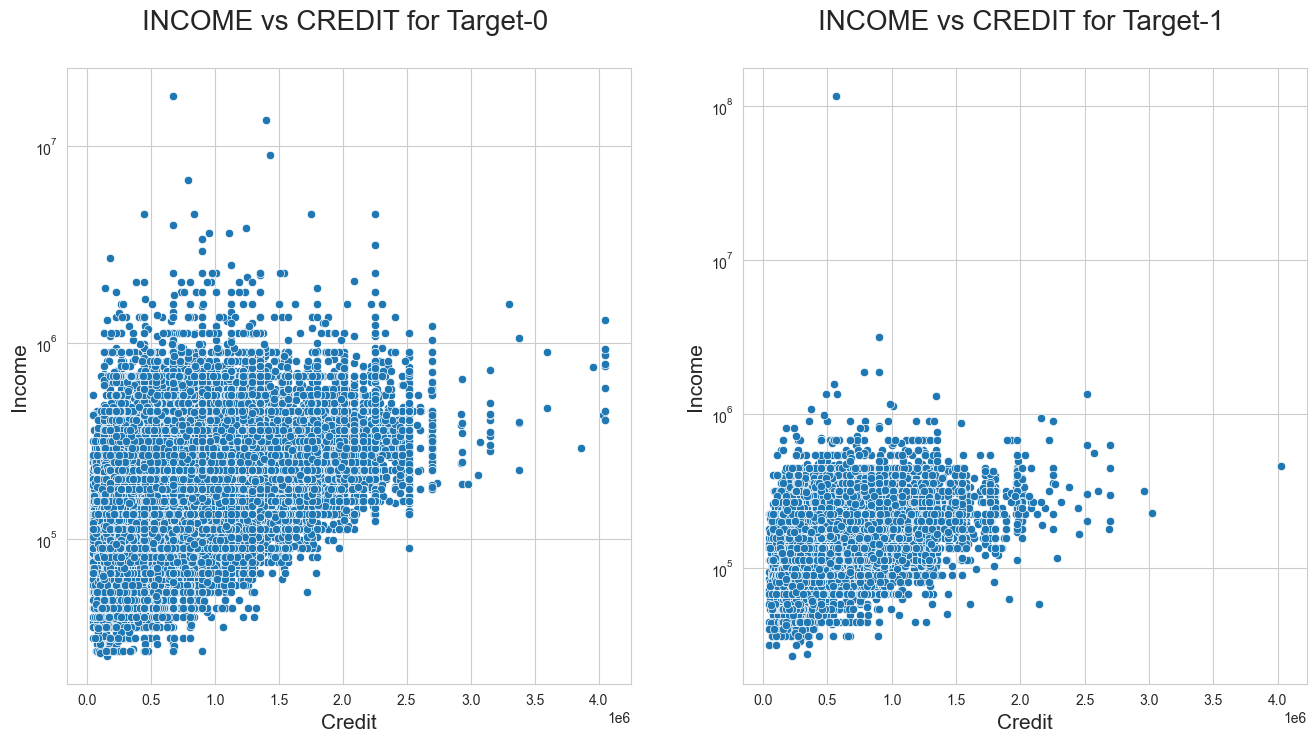

In [177]:
#Plotting scatterplot to find any correlations and to check the trends in the dataset, in logs,

plt.figure(figsize=[16, 8])

# First subplot: Target 0
plt.subplot(1, 2, 1)
sns.scatterplot(x=target_0.AMT_CREDIT, y=target_0.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-0 \n', fontsize=20)
plt.yscale('log')
plt.xlabel("Credit", fontsize=15)
plt.ylabel("Income", fontsize=15)

# Second subplot: Target 1
plt.subplot(1, 2, 2)
sns.scatterplot(x=target_1.AMT_CREDIT, y=target_1.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-1 \n', fontsize=20)
plt.yscale('log')
plt.xlabel("Credit", fontsize=15)
plt.ylabel("Income", fontsize=15)

# Show the plot
# plt.tight_layout()
# plt.show()
# plt.ylabel('Credit', fontsize=15)
# plt.ylabel('income', fontsize=15)
# plt.show()

### Conclusion of the graph
1. Implications for Analysis: The differences between Target-0 and Target-1 indicate the need for targeted strategies in credit assessment and lending practices, potentially requiring further investigation into the factors influencing credit allocation for each group.
2. Overall, these trends provide valuable insights into the relationship between income and credit, highlighting distinct patterns that can inform future financial analyses or lending strategies.



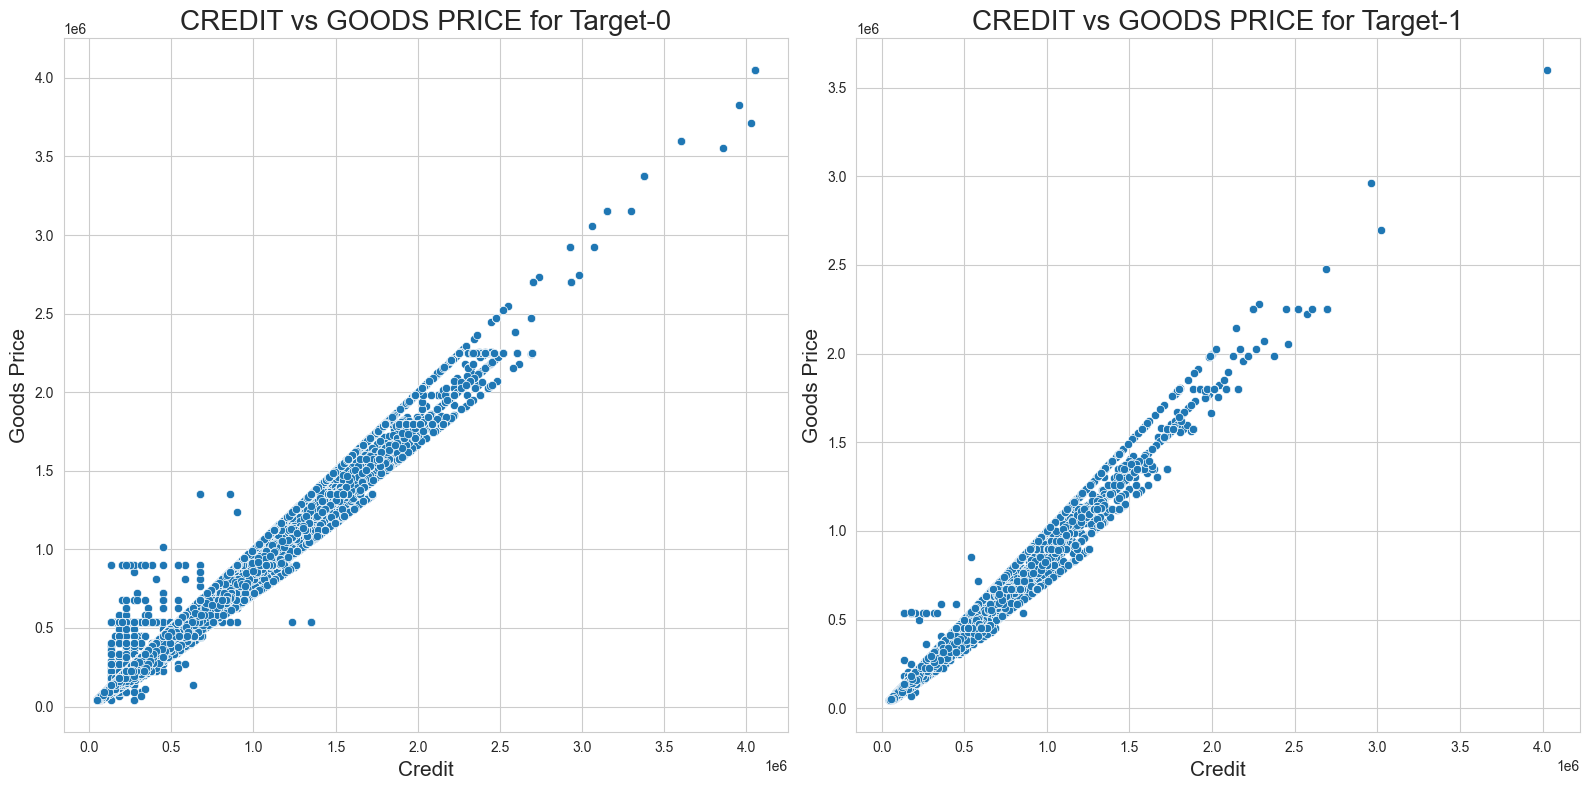

In [181]:
#Plottig Scatterplot to find any correlations an to check the trends in the dataset

plt.figure(figsize=[16, 8])

# First subplot: Target 0
plt.subplot(1, 2, 1)
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=target_0)
plt.title('CREDIT vs GOODS PRICE for Target-0', fontsize=20)
plt.xlabel("Credit", fontsize=15)
plt.ylabel("Goods Price", fontsize=15)

# Second subplot: Target 1
plt.subplot(1, 2, 2)
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=target_1)
plt.title('CREDIT vs GOODS PRICE for Target-1', fontsize=20)
plt.xlabel("Credit", fontsize=15)
plt.ylabel("Goods Price", fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()


### Conclusion of the Graph
1. Insights for Financial Strategies: These findings highlight the importance of understanding customer segments. Target-1 clients might be seen as higher-value customers based on their purchasing behavior and credit patterns, which could inform targeted marketing and lending strategies.
2. Overall, the analysis underscores the consistent relationship between credit and goods price, providing valuable insights for understanding consumer behavior across different target groups.

# Finding the Outliers

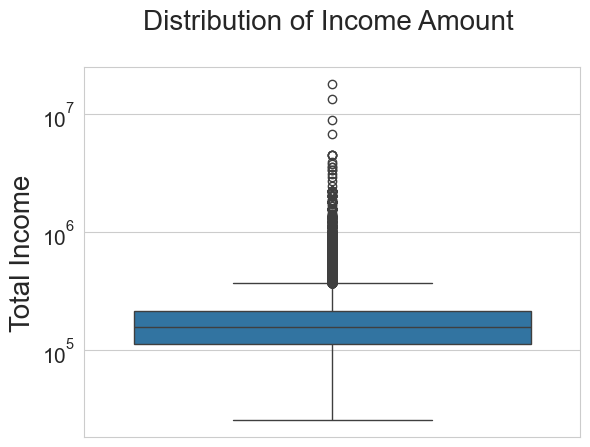

In [182]:
# For Target = 0

# Distribution of Income Amount

sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Income", fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)
plt.show()


## Conclusion from the graph

1. The distribution appears right-skewed due to the concentration of data on the lower side and the long tail of higher income values, highlighting disparities among income earners.

2. Understanding this income distribution is crucial for tailoring financial products, services, and policies. It suggests that initiatives aimed at supporting lower-income individuals may be necessary, while also considering the needs of higher-income earners.

Overall, the analysis of the income distribution reveals significant insights into economic variability within the population, emphasizing the importance of addressing both average and high-income segments.



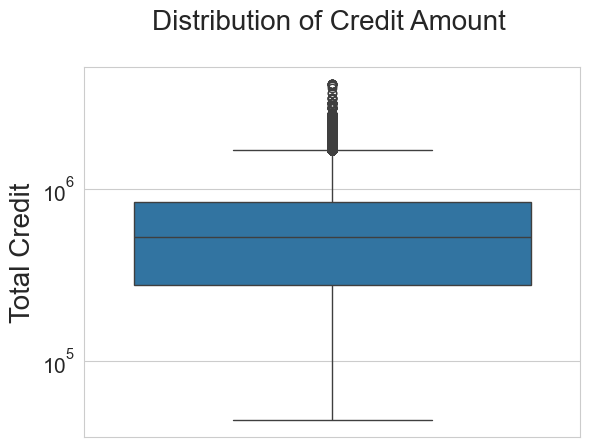

In [185]:
# Distribution of the Credit Amount
sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Credit", fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)
plt.show()

### Conclusion From the graph
1. the first quartile is bigger than the third quartile that means most of the clients credit lies in the first-Quartile
2. The distribution appears to be right-skewed, pointing towards a concentration of lower credit amounts and fewer individuals with very high credit amounts, which indicates potential disparities in credit access.



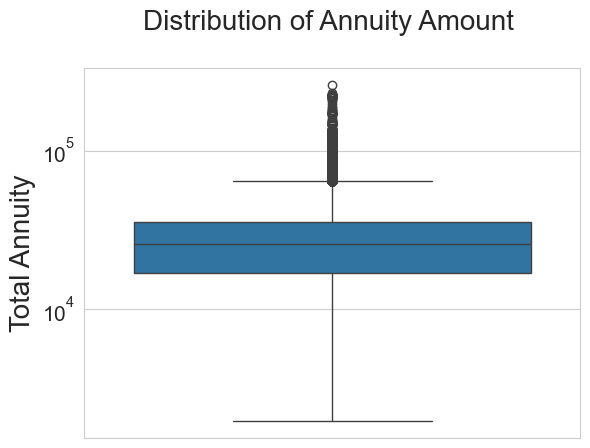

In [188]:
# Distribution of  Annuity
sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Annuity", fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)
plt.show()

### Conclusion from the graph
1. The first Quartile is bigger than the third Quartile
2. The distribution appears to be right-skewed, indicating a concentration of lower annuity amounts with fewer cases of very high annuity values. This suggests income variability among the population.

### For Target = 1

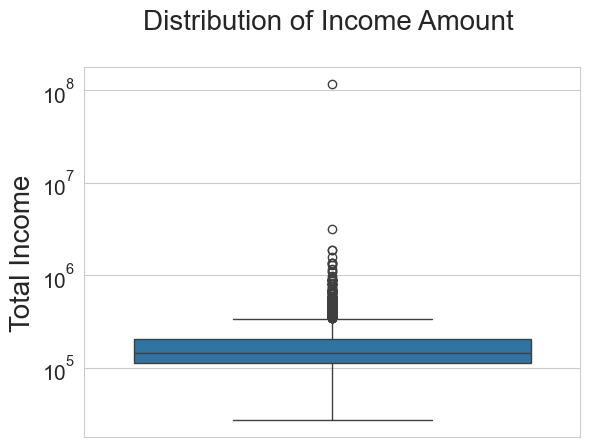

In [184]:
# For Target = 1 
# Distribution of Income Amount

sns.set_style('whitegrid')
sns.boxplot(data=target_1, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Income", fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)
plt.show()

### Conclusion from the graph
1.  The distribution of income appears right-skewed, suggesting that while many individuals earn lower incomes, there are a few with very high incomes, contributing to the overall skewness.
2. Understanding this income distribution is crucial for developing targeted financial products and social policies. It underscores the need for strategies that address both the challenges faced by lower income earners and the behaviors of higher income individuals.

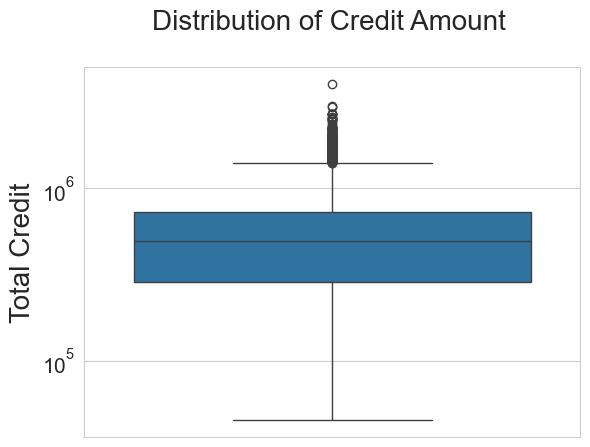

In [187]:
# Distribution of the Credit Amount
sns.set_style('whitegrid')
sns.boxplot(data=target_1, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Credit", fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)
plt.show()

### Conclusion from the Graph
1. The first quartile is bigger than the third quartile. that means most of the client credit lies in the frst quartile
2. Understanding this distribution is critical for financial institutions, as it informs credit policies, risk management, and the development of products tailored to different segments of the population

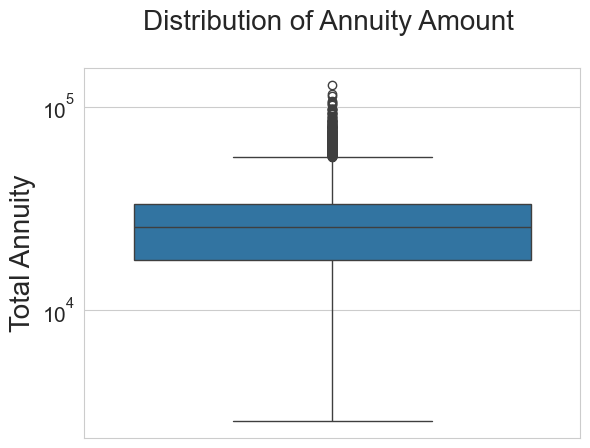

In [189]:
# Distribution of  Annuity
sns.set_style('whitegrid')
sns.boxplot(data=target_1, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Annuity", fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)
plt.show()

### Conclusion from the graph
1. The interquartile range (IQR) indicates that most annuity amounts fall within a specific range, suggesting that a majority of individuals receive moderate annuities.
2. e boxplot shows several outliers on the upper end, highlighting the existence of individuals with exceptionally high annuity amounts, which may indicate inequality in annuity distribution

## Multivariate Analysis

### Target = 0

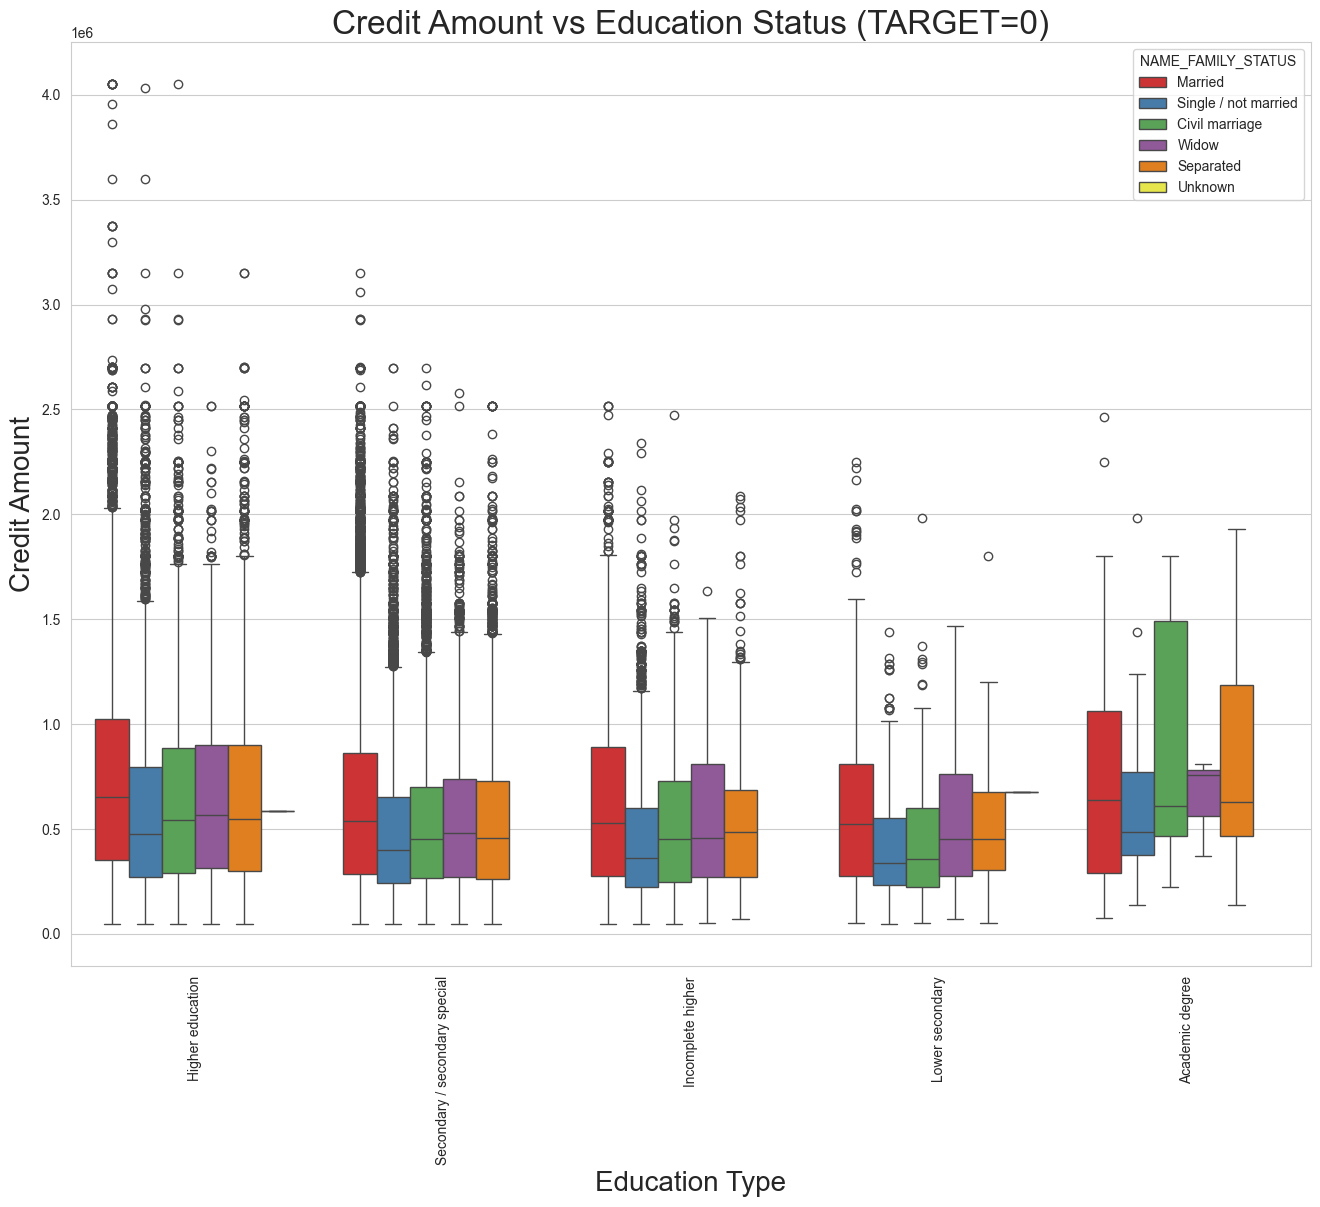

In [198]:
# Box Plotting for the Target = 0 , Credit Amount

plt.figure(figsize=[16, 12])

# Boxplot
sns.boxplot(data=target_0, 
            x='NAME_EDUCATION_TYPE', 
            y='AMT_CREDIT', 
            hue='NAME_FAMILY_STATUS', 
            palette='Set1')

# Adjusting aesthetics
plt.xticks(rotation=90)
plt.xlabel('Education Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit Amount vs Education Status (TARGET=0)', fontsize=24)

# Display the plot
plt.show()


### Conclusion from the Graph
1. The family status appears to affect credit amounts, with married individuals generally accessing higher credit limits, while those in categories like "Seperated" or "Unknown" tend to have lower median credit amounts.
2. There are numerous outliers, particularly in higher education categories, indicating that some individuals may have exceptionally high credit amounts. This variance could be due to factors like income, creditworthiness, or financial behavior.
3.  Understanding these dynamics is crucial for financial institutions. It can inform lending practices, tailor products to specific demographic segments, and develop strategies that address the needs of individuals with varying education levels and family statuses.

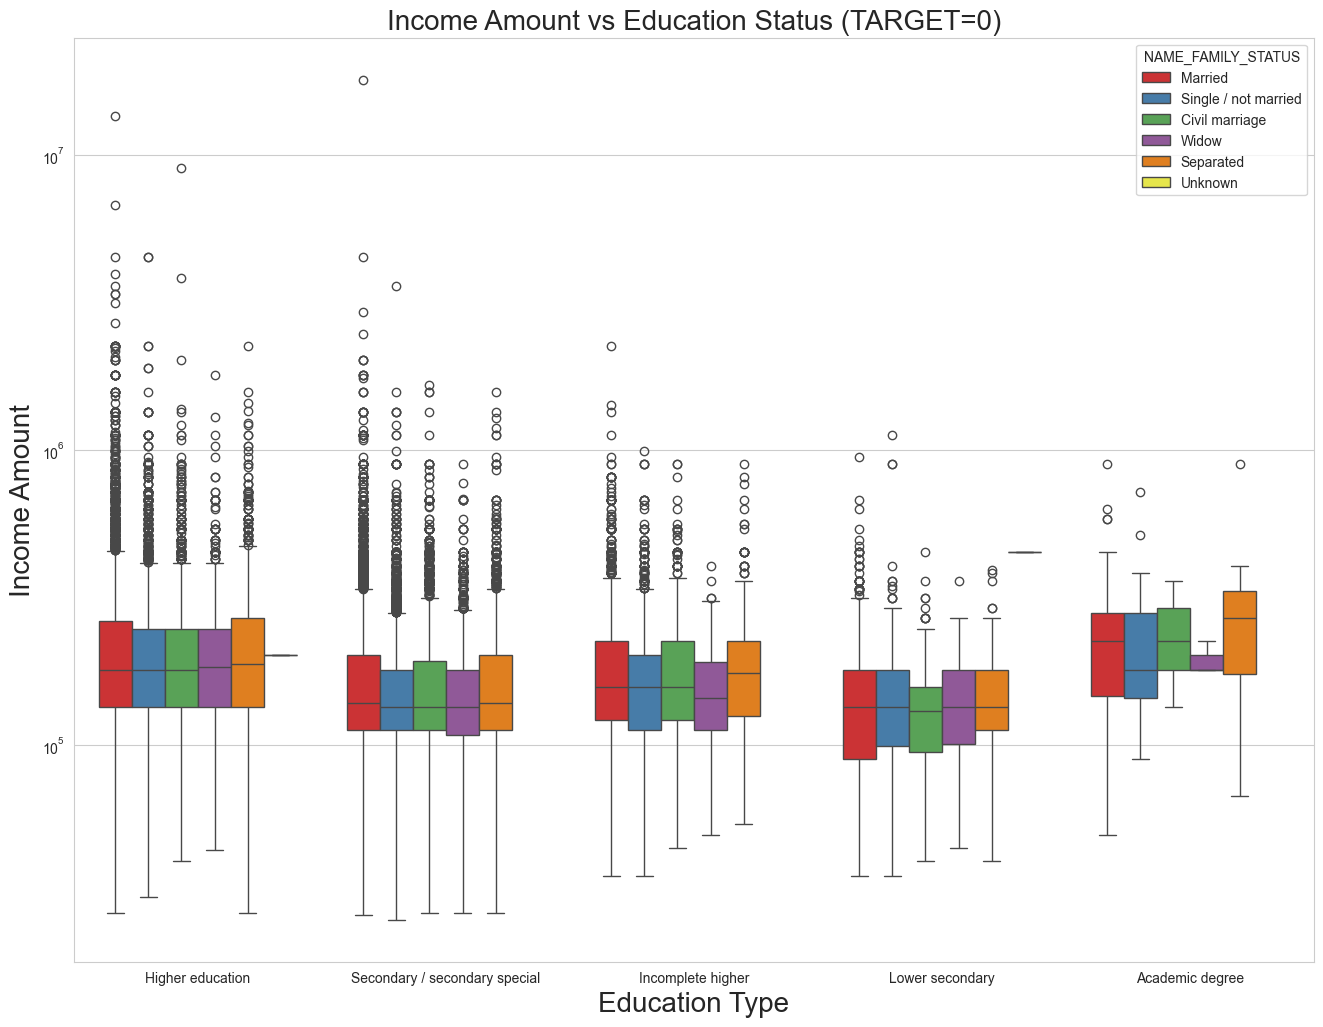

In [292]:
# Box Plotting for the Target = 0, Income Amount
plt.figure(figsize=[16,12])

# Boxplot
sns.boxplot(data=target_0, 
            x='NAME_EDUCATION_TYPE', 
            y='AMT_INCOME_TOTAL', 
            hue='NAME_FAMILY_STATUS', 
            palette='Set1')

# Adjusting aesthetics
plt.xticks(rotation=0)
plt.xlabel('Education Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income Amount vs Education Status (TARGET=0)', fontsize=20)

# Display the plot
plt.show()

### Conclusion From the Graph
1. The income distributions for various education types appear right-skewed, highlighting that while many individuals earn lower to moderate incomes, there are notable cases of high earners, particularly in the higher education group.
2. The presence of numerous outliers, particularly among those with higher education, indicates that some individuals earn significantly more than their peers, contributing to increased income inequality within these groups.

# Cleaning the Previous_application Dataset

In [211]:
# Previewing the previous_Dataset 
df_prev.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
5,1383531,199383,Cash loans,315000.0,340573.5,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,0.0,0.0,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Cash
7,1656711,296299,Cash loans,0.0,0.0,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Cash
8,2367563,342292,Cash loans,0.0,0.0,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Cash
9,2579447,334349,Cash loans,0.0,0.0,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Cash


In [213]:
# Analyzing the shape 
df_prev.shape

(1670214, 23)

In [214]:
# Checking the Null values in the Dataset
round((100*df_prev.isnull().sum()/len(df_prev)),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [217]:
# Checking the NA.ME_CASH_LOAN_PURPOSE for any unique values
df_prev.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [218]:
# We Got two Unknown Columns in our Dataset 'XAP' and 'XNA' We have to drop 
df_prev = df_prev.drop(df_prev[df_prev.NAME_CASH_LOAN_PURPOSE == 'XAP'].index)
df_prev = df_prev.drop(df_prev[df_prev.NAME_CASH_LOAN_PURPOSE == 'XNA'].index)

In [219]:
# ReChecking the NAME_CASH_LOAN_PURPOSE for any unique values
df_prev.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: count

# Merging Two Dataset that is application_dataset and Previous_dataset

In [244]:
# Merging the Two Datasets

loan_data = pd.merge(left=df_app, right=df_prev, how='inner', on='SK_ID_CURR', suffixes=('_','x'))




In [228]:
# Previewing the new Datset
loan_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BINNED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799,-3015,1.0,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,0,0,0,0,0,0,150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266,-3787,2.0,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0,0,0,1,0,5,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557,-3557,3.0,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0,0,0,0,1,1,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0,0,0,1,0,1,500000-550000,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0,0,0,1,0,1,500000-550000,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
5,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,-12282,-778,-1824,-1992,2.0,TUESDAY,10,0,0,0,0,0,0,Emergency,0.705947,4.0,0.0,4.0,0.0,0,0,0,1,0,0,450000-500000,1191663,Cash loans,180000.0,180000.0,FRIDAY,13,Y,1,Repairs,Approved,-466,Cash through the bank,XAP,New,XNA,Cash,walk-

In [246]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51420 entries, 0 to 51419
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   51420 non-null  int64   
 1   TARGET                       51420 non-null  int64   
 2   NAME_CONTRACT_TYPE_          51420 non-null  object  
 3   CODE_GENDER                  51420 non-null  object  
 4   FLAG_OWN_CAR                 51420 non-null  object  
 5   FLAG_OWN_REALTY              51420 non-null  object  
 6   CNT_CHILDREN                 51420 non-null  int64   
 7   AMT_INCOME_TOTAL             51420 non-null  float64 
 8   AMT_CREDIT_                  51420 non-null  float64 
 9   AMT_ANNUITY                  51420 non-null  float64 
 10  AMT_GOODS_PRICE              51420 non-null  float64 
 11  NAME_TYPE_SUITE              51420 non-null  object  
 12  NAME_INCOME_TYPE             51420 non-null  object  
 13  N

In [254]:
# Renaming the Columns in the new Dataset Loan_data

loan_data   = loan_data.rename({'NAME_CONTRACT_TYPE_': 'NAME_CONTRACT_TYPE', 'AMT_CREDIT_':'AMT_CREDIT', 'AMT_ANNUITY_': 'AMT_ANNUITY', 
                                'WEEKDAY_APPR_PROCESS_START_': 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START_': 'HOUR_APPR_PROCESS_START',
                                'NAME_CONTRACT_TYPEx': 'NAME_CONTRACT_TYPE_PREV', 'AMT_CREDITx': 'AMT_CREDIT_PREV', 'AMT_ANNUITYx': 'AMT_ANNUITY_PREV',
                                'WEEKDAY_APPR_PROCESS_STARTx': 'WEEKDAY_APPR_PROCESS_START_PREV', 'HOUR_APPR_PROCESS_STARTx': 'HOUR_APPR_PROCESS_START_PREV'},
                                axis=1)

In [255]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51420 entries, 0 to 51419
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   SK_ID_CURR                       51420 non-null  int64   
 1   TARGET                           51420 non-null  int64   
 2   NAME_CONTRACT_TYPE               51420 non-null  object  
 3   CODE_GENDER                      51420 non-null  object  
 4   FLAG_OWN_CAR                     51420 non-null  object  
 5   FLAG_OWN_REALTY                  51420 non-null  object  
 6   CNT_CHILDREN                     51420 non-null  int64   
 7   AMT_INCOME_TOTAL                 51420 non-null  float64 
 8   AMT_CREDIT                       51420 non-null  float64 
 9   AMT_ANNUITY                      51420 non-null  float64 
 10  AMT_GOODS_PRICE                  51420 non-null  float64 
 11  NAME_TYPE_SUITE                  51420 non-null  object  
 12  NAME

In [256]:
# Droping the Unwanted columns 
loan_data.drop(['SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
           'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'WEEKDAY_APPR_PROCESS_START_PREV',
           'HOUR_APPR_PROCESS_START_PREV','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

In [258]:
loan_data.isnull().sum()

TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                  0
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
CNT_FAM_MEMBERS                  0
ORGANIZATION_TYPE                0
EXT_SOURCE_2                    45
OBS_30_CNT_SOCIAL_CIRCLE        68
DEF_30_CNT_SOCIAL_CIRCLE        68
OBS_60_CNT_SOCIAL_CIRCLE        68
DEF_60_CNT_SOCIAL_CIRCLE        68
AMT_REQ_CREDIT_BUREAU_HOUR       0
AMT_REQ_CREDIT_BUREA

# UniVariate Analysis

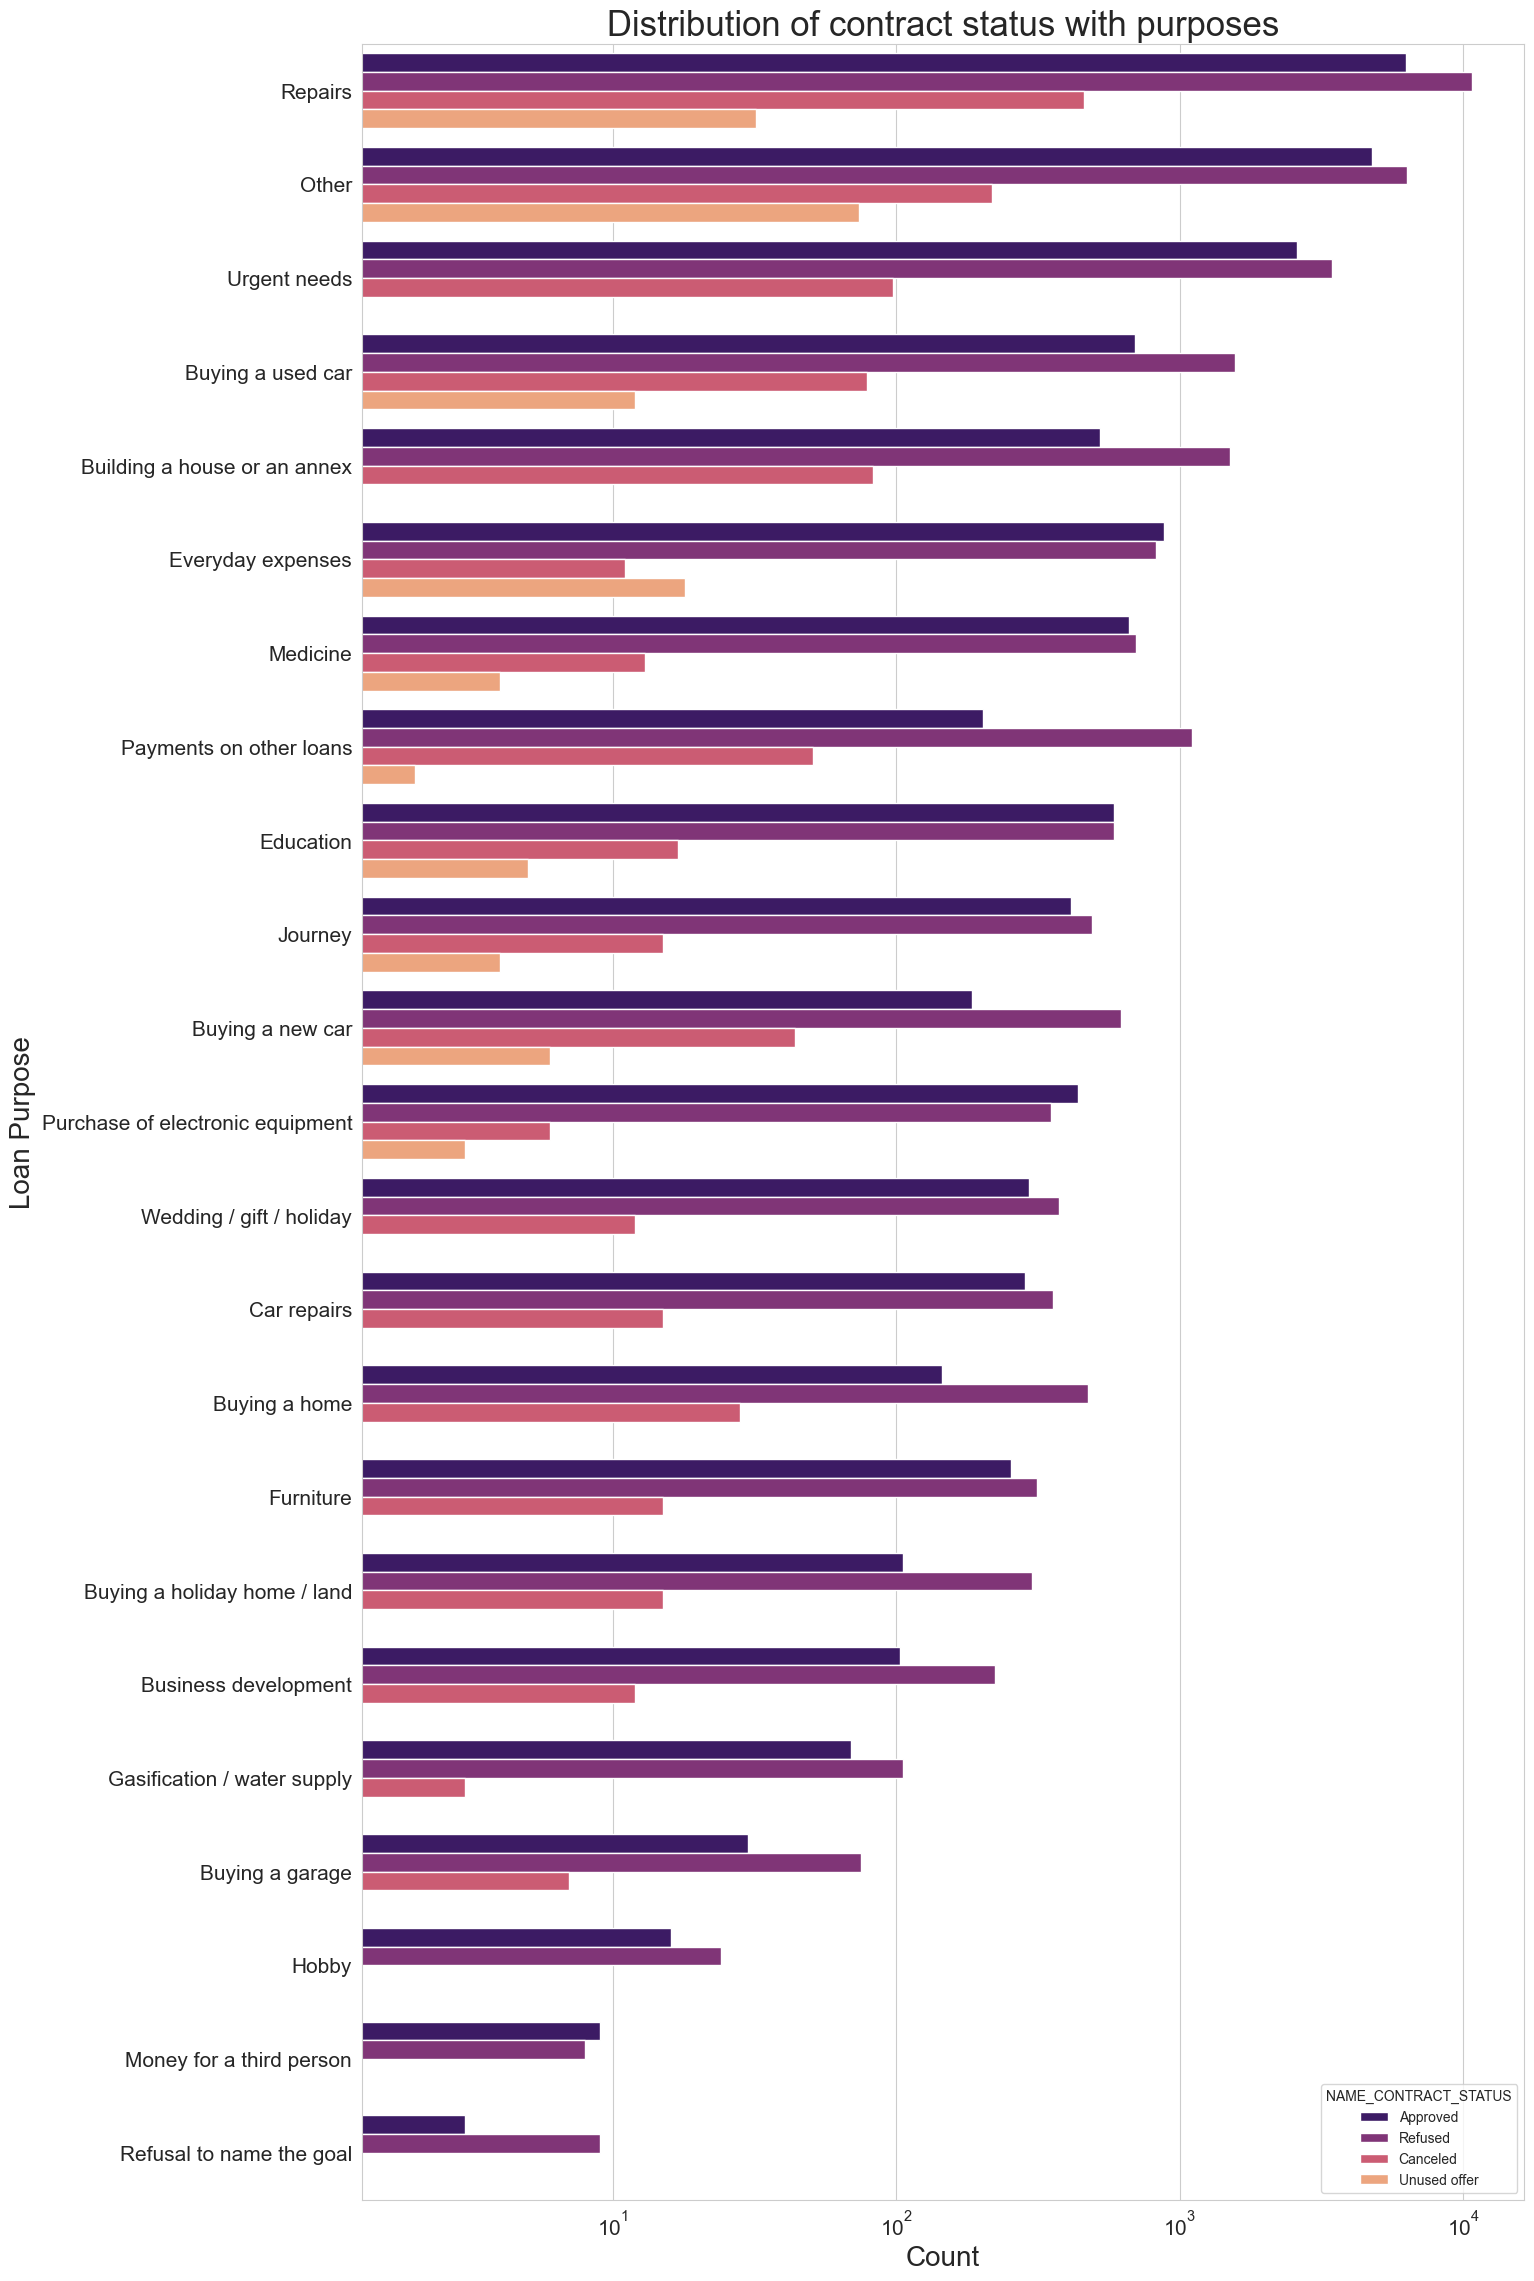

In [264]:
plt.figure(figsize=[15,28])

sns.countplot(data = loan_data, y  = 'NAME_CASH_LOAN_PURPOSE',order=loan_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of contract status with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

### Conclusion from the Graph
1. Certain categories, such as "Refusal to name the goal" and "Buying a holiday home/land," show higher rates of loan refusals or cancellations. This could suggest a lack of clarity in the application or higher perceived risk by financial institutions.
2. The data indicates that lenders might consider focusing more on high-demand categories such as home and car-related loans, while improving processes or criteria for loans that typically face refusals to ensure broader accessibility.
3. The majority of applications for purposes like "Repairs," "Buying a used car," and "Buying a home" are approved, indicating that these categories are deemed low-risk or high-need by lenders.

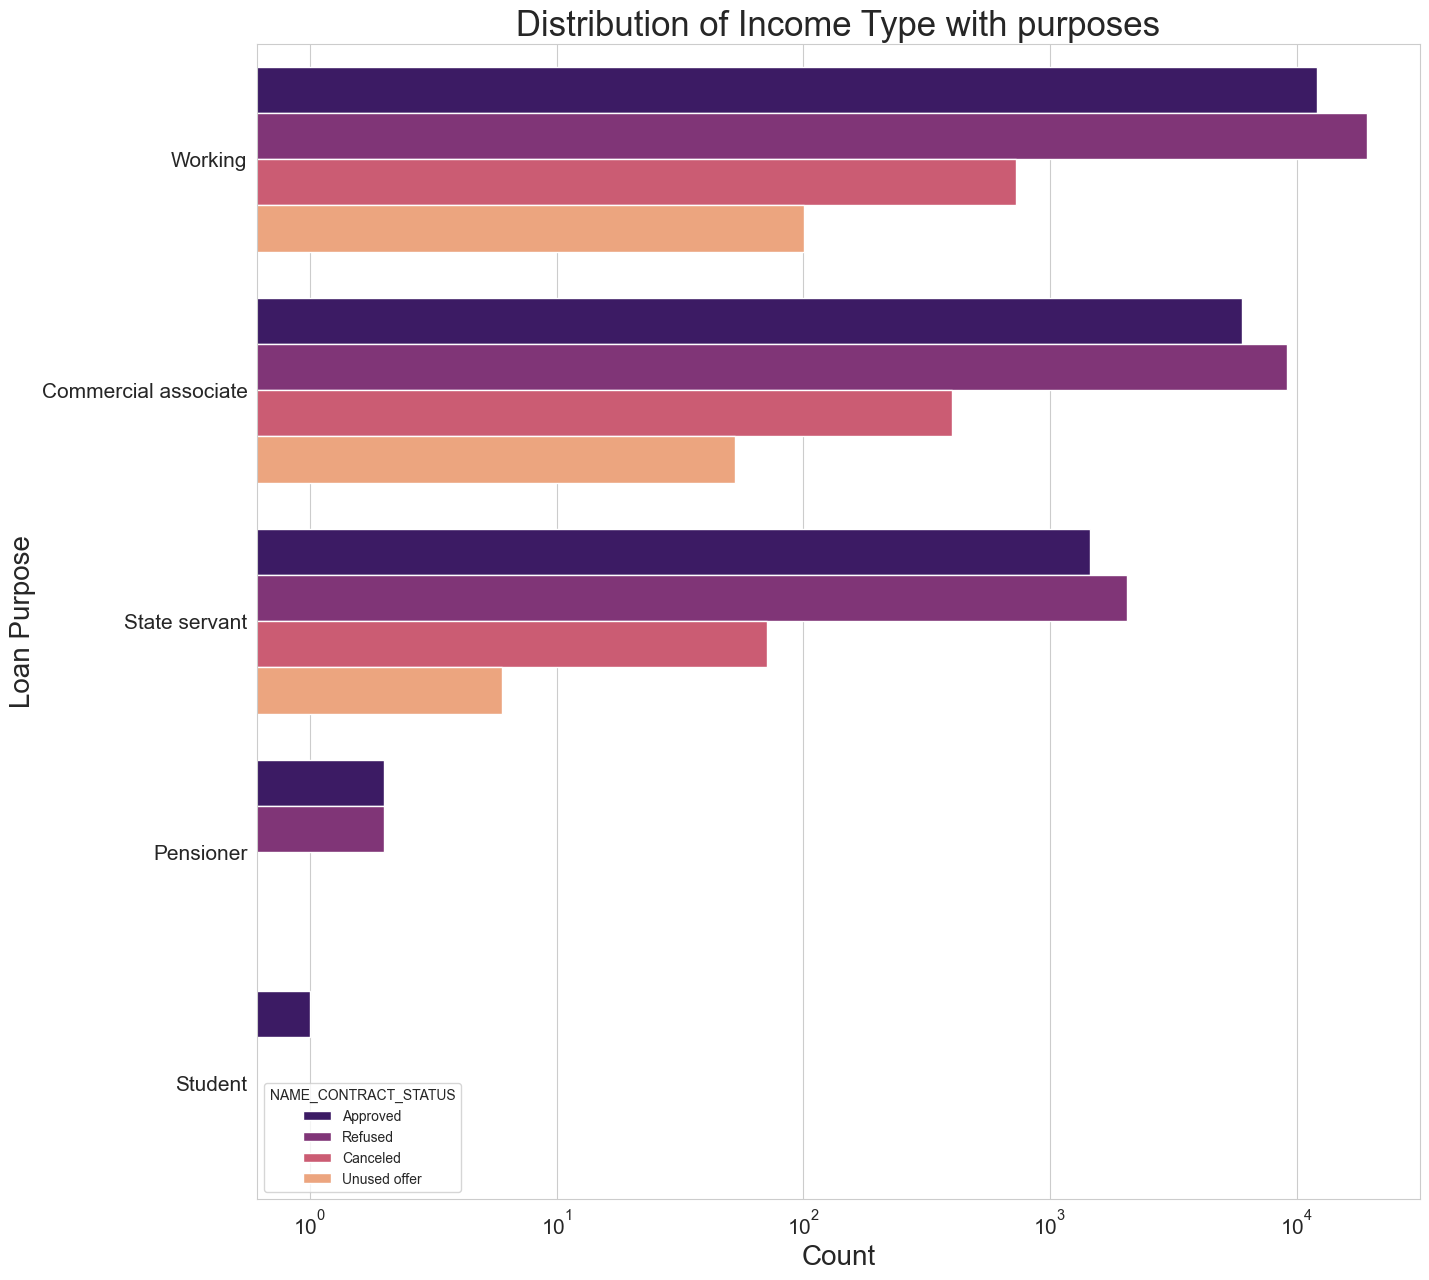

In [293]:
plt.figure(figsize=[15,15])

sns.countplot(data = loan_data, y  = 'NAME_INCOME_TYPE',order=loan_data['NAME_INCOME_TYPE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of Income Type with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

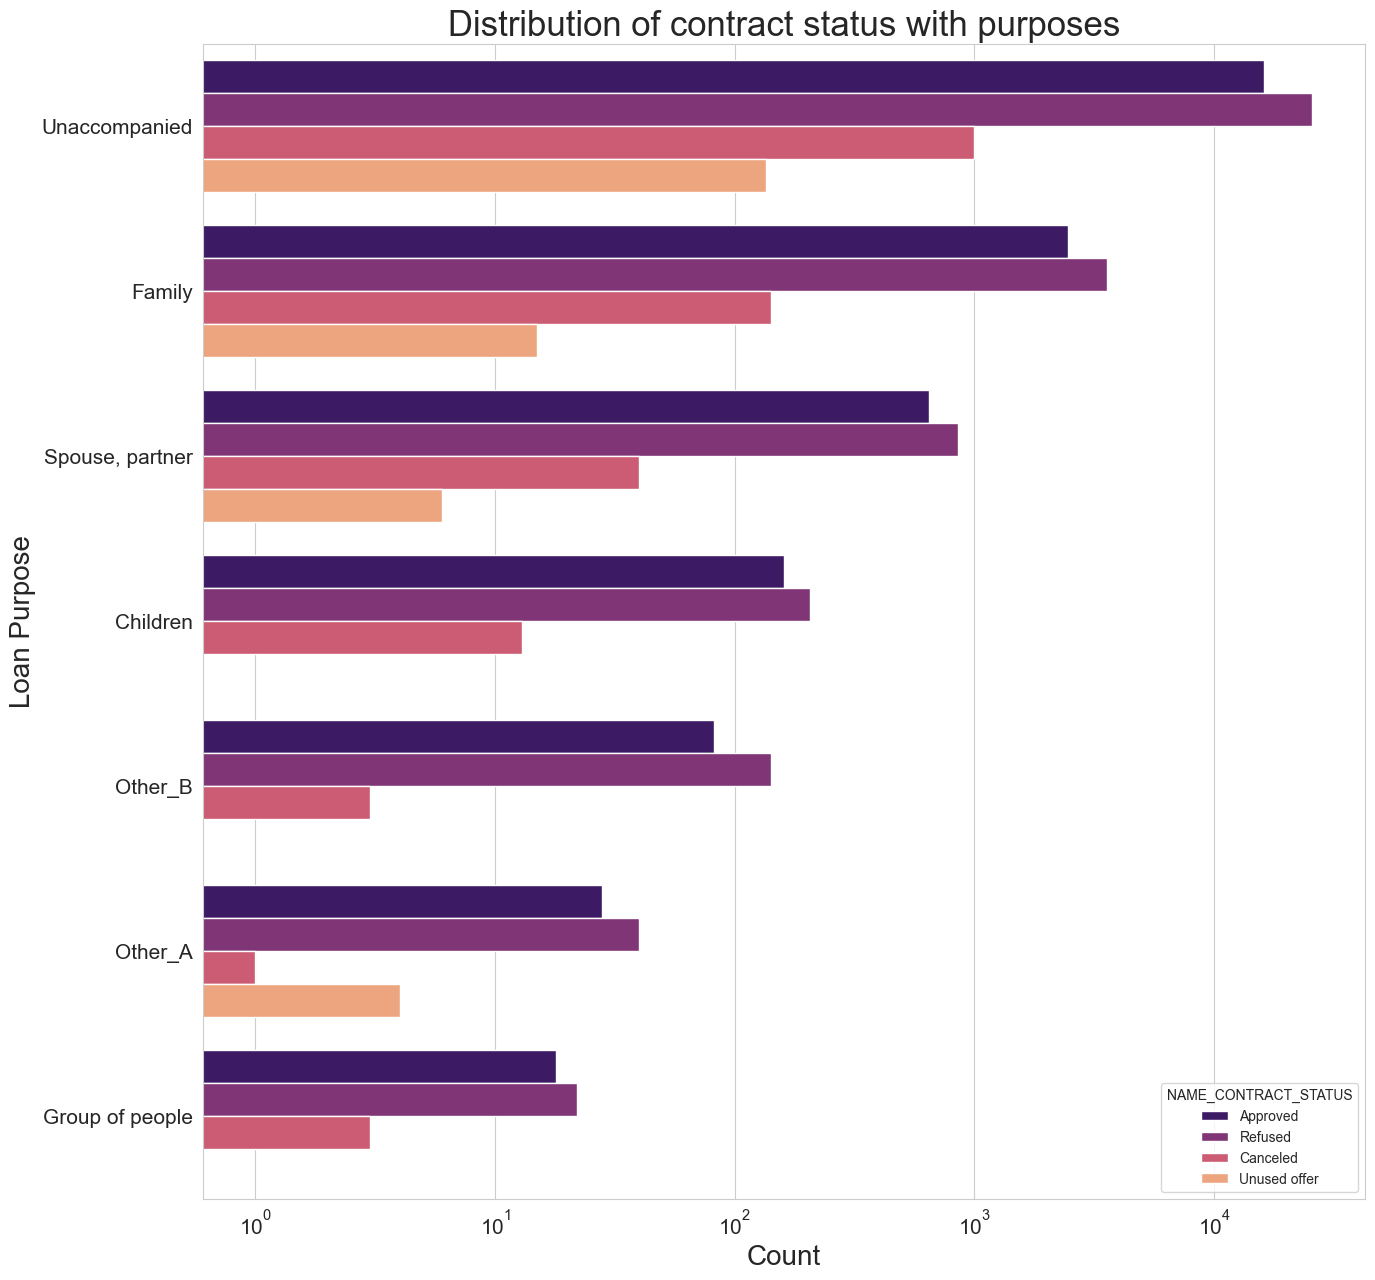

In [274]:
plt.figure(figsize=[15,15])

sns.countplot(data = loan_data, y  = 'NAME_TYPE_SUITE',order=loan_data['NAME_TYPE_SUITE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of contract status with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

### Conclusion from the Graph
1. The chart reveals the distribution of loan applications by income type, showing that "Working" individuals represent the largest segment of loan seekers across various purposes.
2. The majority of loans for "Working" and "State servant" categories are approved, indicating that lenders view these income types favorably, likely due to perceived stability and reliability.
3. The data highlights the importance of tailoring loan products and services to meet the needs of various income types. Lenders might consider revising criteria or developing specialized products for students and pensioners to enhance access.

# Bivariate Analysis

Text(0.5, 1.0, 'Prev Credit amount vs Loan Purpose \n')

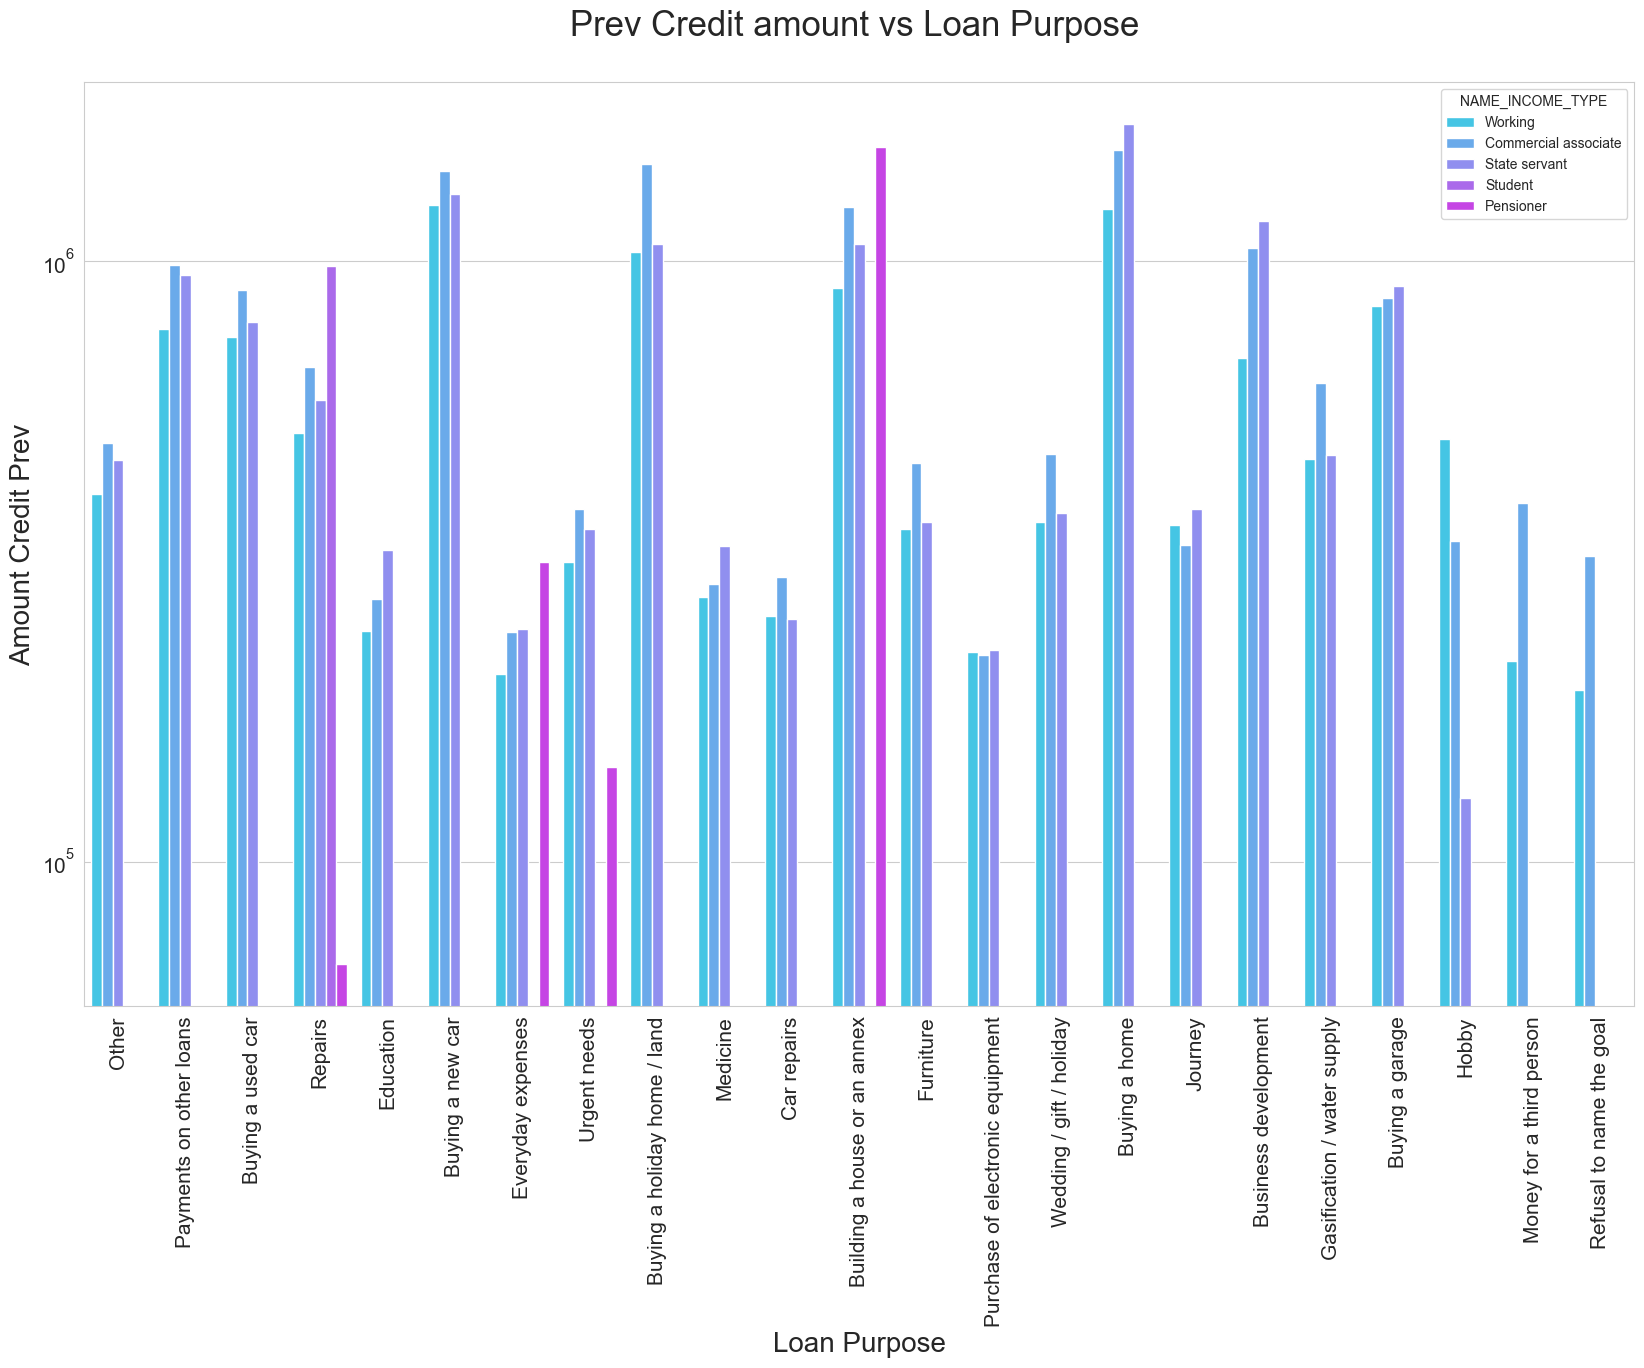

In [285]:
# Plotting for Credit amount in Logarithmic scale

plt.figure(figsize=(20,12))

sns.barplot(data=loan_data, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_PREV', orient='v', palette='cool',errorbar=None)

plt.xticks(rotation=90)

plt.ylabel('Amount Credit Prev', fontsize=20)

plt.xlabel('Loan Purpose', fontsize=20)

plt.yscale('log')

plt.xticks(fontsize=15)

plt.yticks(fontsize=15) 

plt.title('Prev Credit amount vs Loan Purpose \n', fontsize=25)

### Conclusion from the Graph
1. The graph illustrates how previously issued credit amounts vary across different loan purposes and income types, revealing key insights into borrowing behaviors.
2. Working" individuals consistently show the highest credit amounts across most loan purposes,The credit amounts for "Students" and "Pensioners" are notably lower across most loan purposes.
3. Common loan purposes such as "Buying a new car" and "Everyday expenses" are associated with higher credit amounts
4. The striking differences in credit amounts based on income type and loan purpose highlight the need for lenders to consider personalized approaches. Tailoring products to address the unique needs of students and pensioners could enhance their access to credit.

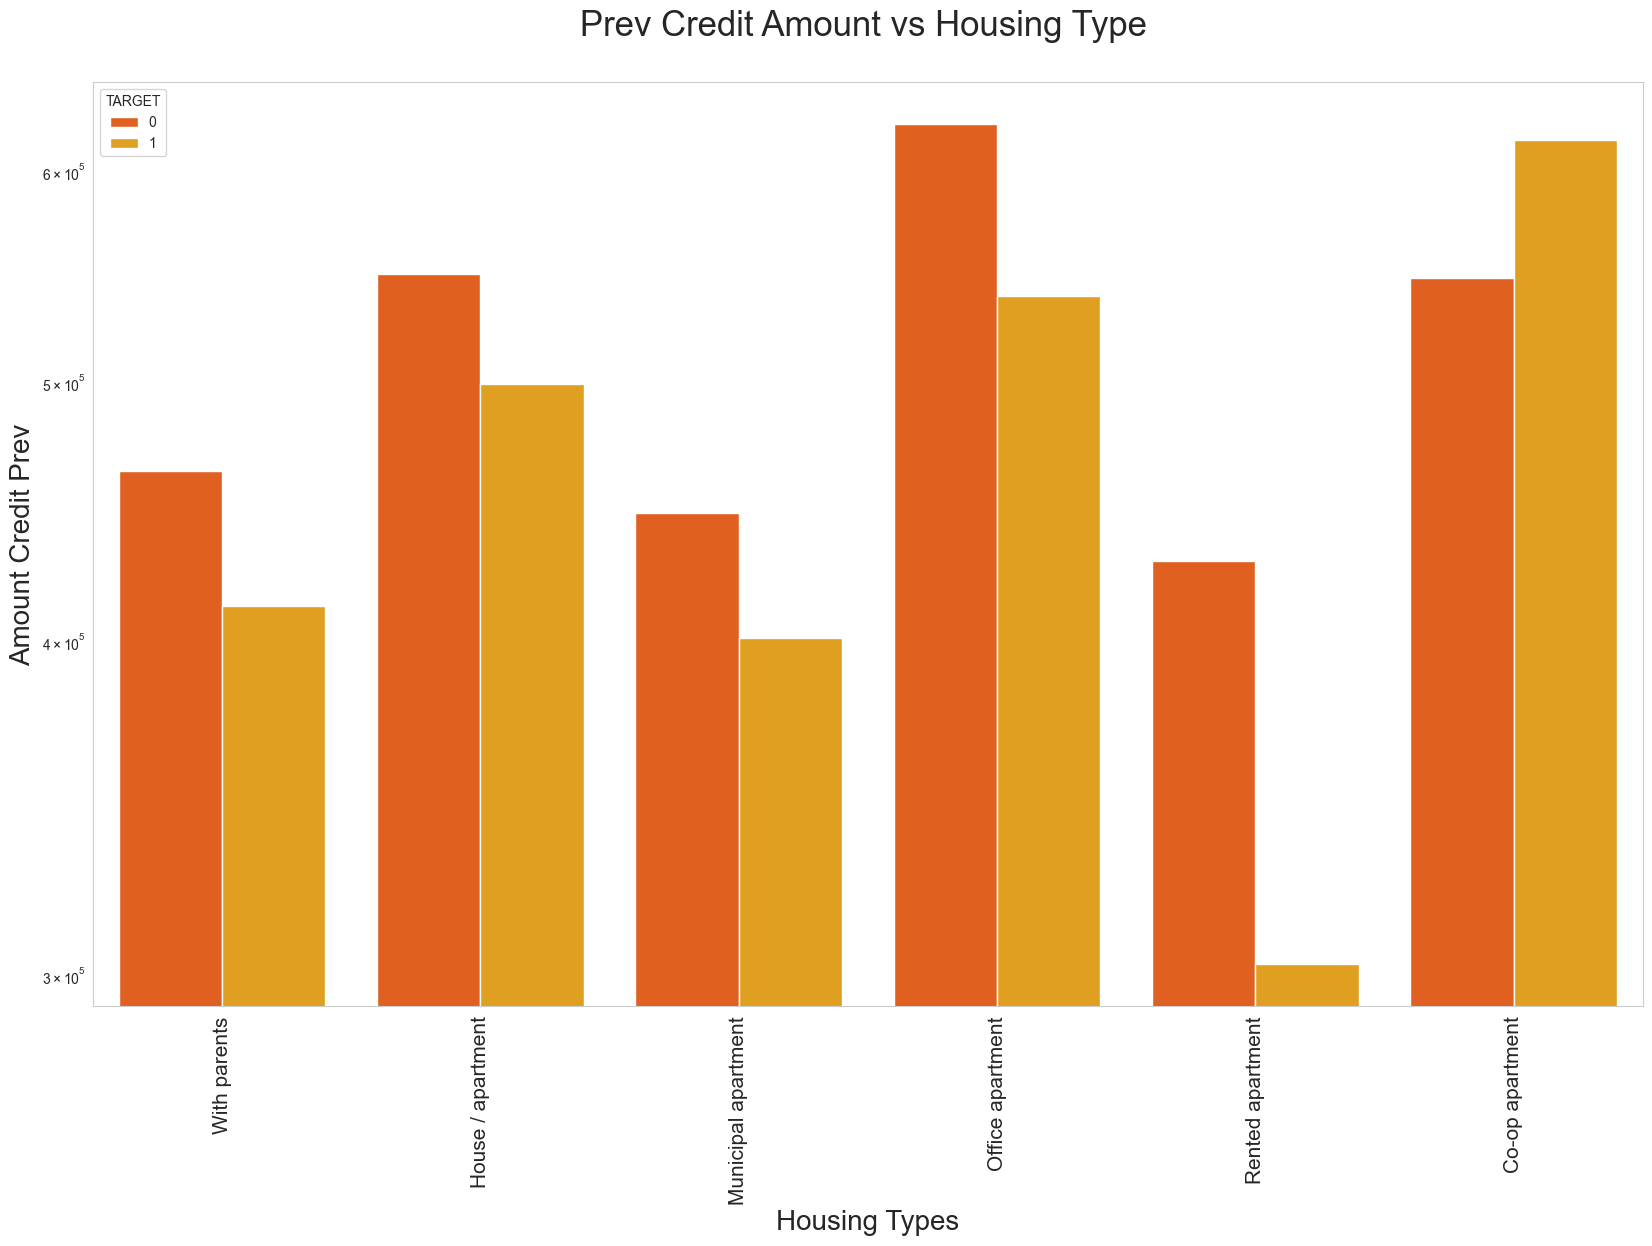

In [289]:
#plotting for credit amount_prev and Housing Type


plt.figure(figsize=(20, 12))

# Barplot
sns.barplot(
    data=loan_data,
    x='NAME_HOUSING_TYPE',
    hue='TARGET',
    y='AMT_CREDIT_PREV',
    palette='autumn',
    errorbar=None
)

plt.xticks(rotation=90)

plt.ylabel('Amount Credit Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)

plt.yscale('log')

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Prev Credit Amount vs Housing Type \n', fontsize=25)

plt.show()


### Conclusion of the Graph
1. The graph highlights distinctions in previous credit amounts across various housing types, providing insights into borrowing behavior among different demographics.
2. Individuals living "With parents" exhibit the highest average credit amounts, suggesting a potential financial safety
3. Those in "House/apartment" settings also show robust credit amounts, while those in "Rented apartments" display notably lower credit amounts
4. The distinction between TARGET=0 and TARGET=1 suggests differing risk profiles, with the higher credit amounts for TARGET=1 indicating that those who are deemed lower risk may have better access to larger loans, particularly in housing arrangements that offer stability.
5. These trends emphasize the need for lenders to consider housing types when assessing creditworthiness. Tailoring lending strategies to accommodate the unique characteristics of borrowers based on their living situations could enhance access to credit.

# Conclusion

This Exploratory Data Analysis (EDA) project focuses on understanding and deriving insights from two datasets: application data and previous application data. These datasets contain customer information and previous loan application records, aimed at identifying patterns and correlations in loan approvals and defaults.

#### AMT_INCOME_TOTAL:
Represents the total income of the applicant.
In the boxplot comparing education type and family status, income levels vary significantly, highlighting their relationship to creditworthiness.
Key Insight: Income levels directly correlate with contract acceptance and repayment ability.

#### NAME_INCOME_TYPE:
This column categorizes applicants by their income source (e.g., working, pensioner, etc.).
Key Insight: Certain income types (like working professionals) are more prevalent in contract approvals, as seen in the count plot.

#### AMT_CREDIT & AMT_CREDIT_PREV:
Both columns indicate credit amounts (current and previous applications).
Key Insight: The barplot showing the relationship between AMT_CREDIT_PREV, housing types, and TARGET highlights how housing type influences credit volume.


#### NAME_HOUSING_TYPE:
Categories of housing types are compared against credit amounts and target statuses.
Key Insight: Certain housing types (e.g., "House / apartment") have higher loan amounts and repayment challenges.


#### NAME_EDUCATION_TYPE:
Categorizes the education level of the applicants.
The boxplot indicates significant differences in income levels by education, which impacts creditworthiness.
Key Insight: Education is a critical factor influencing both income and default likelihood.

#### NAME_FAMILY_STATUS:
This column indicates the applicant's family status (e.g., married, single, etc.).
Key Insight: Family status is correlated with income and credit behavior, as seen in the income distribution boxplot.

#### CODE_GENDER:
Indicates the gender of the applicant.
Key Insight: Gender-based differences in loan approval and credit behavior may exist, though not deeply explored.

#### DAYS_BIRTH:
The applicant's age (in days) derived from this column.
Key Insight: Older applicants may have different credit behaviors or risk levels.

#### NAME_CONTRACT_STATUS:
Indicates the status of the contract (e.g., approved, refused).
Key Insight: The count plot highlights differences in contract approval rates across income and loan purpose categories.

#### AMT_ANNUITY & AMT_ANNUITY_PREV:
Represents the annuity payment amounts.
Key Insight: Higher annuity values are observed in specific groups, reflecting repayment capacity and credit risk.

# Key Findings
From the report's graphs:
TARGET, AMT_INCOME_TOTAL, AMT_CREDIT, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, and NAME_FAMILY_STATUS stand out as the most influential columns in determining credit behavior, loan approval, and default risks.

Secondary columns like NAME_HOUSING_TYPE, EXT_SOURCE_2, and DAYS_BIRTH provide additional context and nuance for understanding applicant profiles.